In [1]:
from google.colab import drive
drive.mount('gdrive')
#Run this

Mounted at gdrive


In [2]:
import zipfile
import os

# Define the path to the zip file and extraction destination
zip_file_path = '/content/gdrive/MyDrive/FER2013_happy_sad.zip'
extraction_path = '/content/FER2013_happy_sad/'  # The folder where you want to extract the contents

# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f'Files extracted to: {extraction_path}')

#Run this


Files extracted to: /content/FER2013_happy_sad/


In [3]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Paths to the dataset
dataset_path = '/content/FER2013_happy_sad'  # Change to your mounted path

# Emotions available in the dataset
emotions = ['happy', 'sad']

#Run this


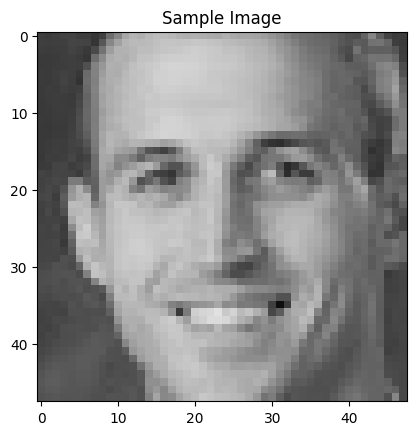

In [4]:
import matplotlib.pyplot as plt

# Display a sample image to check if it's loaded correctly
img_path = os.path.join(dataset_path, 'train', 'happy', os.listdir(os.path.join(dataset_path, 'train', 'happy'))[0])
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Sample Image')
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Paths to the dataset
dataset_path = '/content/FER2013_happy_sad'  # Change to your mounted path

# Emotions available in the dataset
emotions = ['happy', 'sad']

# Function to extract HOG features from an image
def extract_hog_features(image):
    # Convert to grayscale if necessary
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate HOG features
    hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    return hog_features

# Data lists for all images
X = []
y = []

# Loop through each set (train and test), each emotion, and extract features
for set_folder in ['train', 'test']:
    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, set_folder, emotion)
        for img_name in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                features = extract_hog_features(img)
                if features is not None:
                    X.append(features)
                    y.append(emotion)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"Extracted {len(X)} feature vectors from all images.")

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shape of the training and testing sets to verify
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Extracted 15066 feature vectors from all images.
Training set size: 12052 samples
Testing set size: 3014 samples


In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt

def extract_hog_features(image, visualize=False):
    # Convert to grayscale (if the image is not already grayscale)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate HOG features and optionally get the HOG image for visualization
    if visualize:
        hog_features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                                      cells_per_block=(2, 2), visualize=True)
        return hog_features, hog_image
    else:
        hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        return hog_features


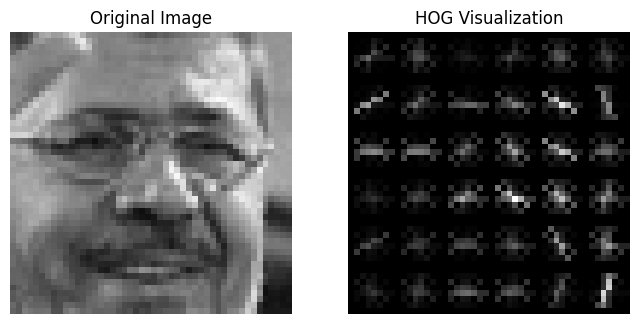

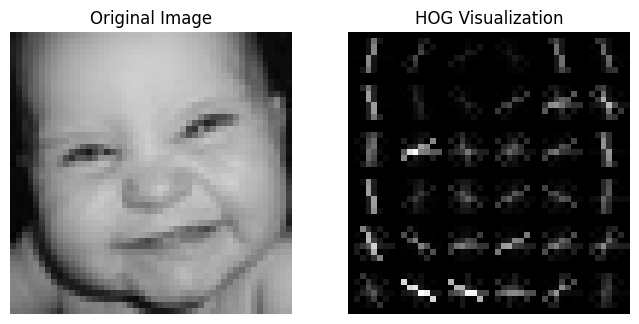

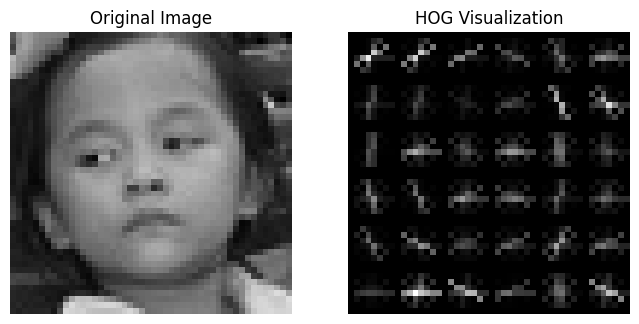

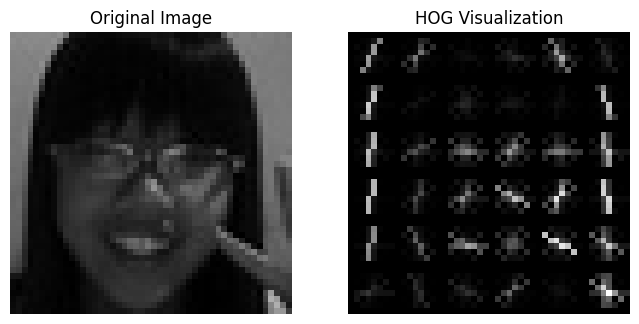

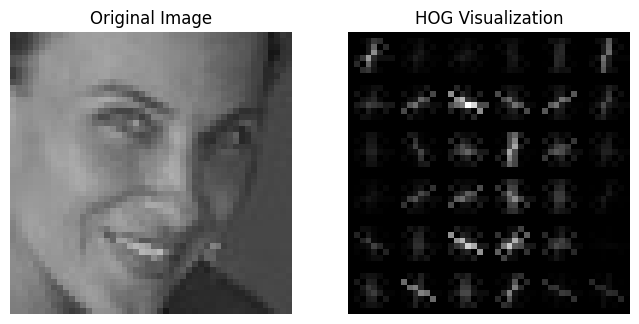

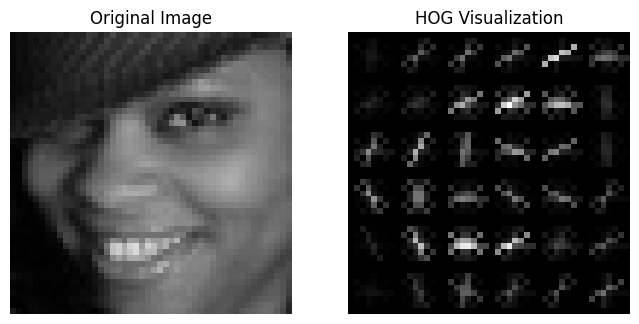

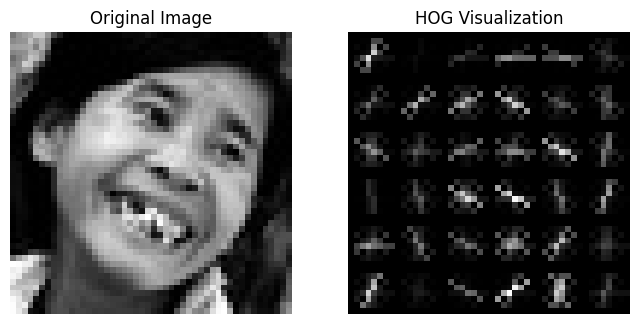

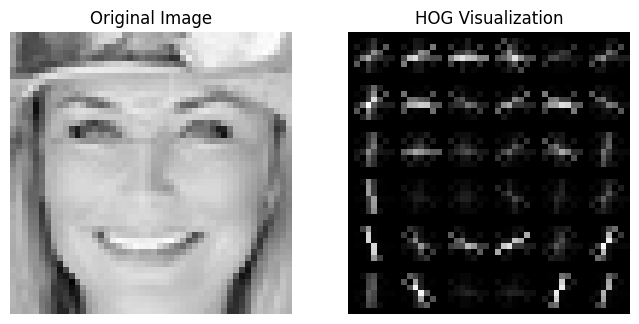

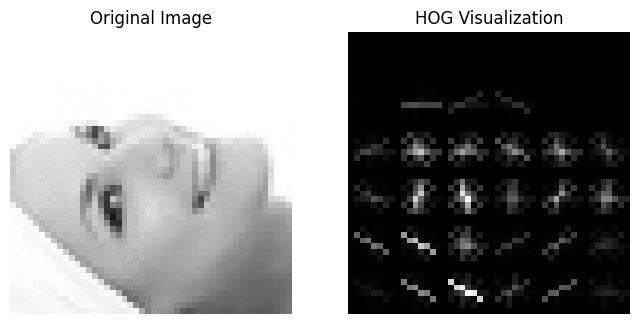

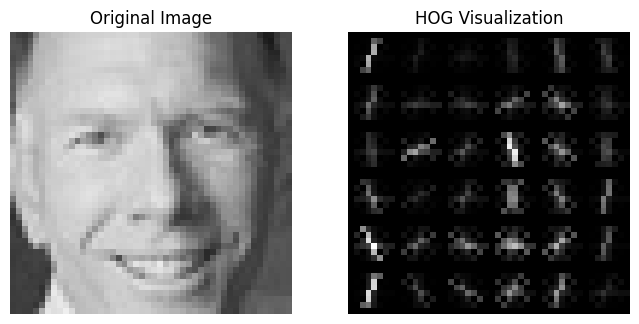

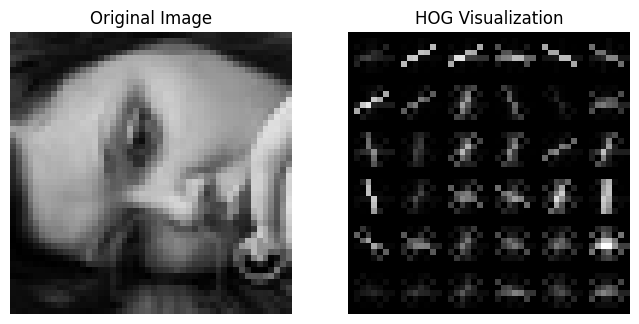

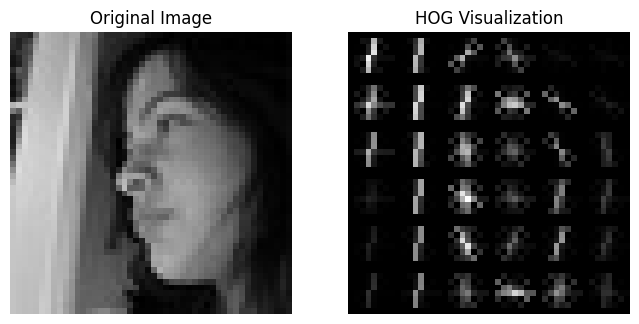

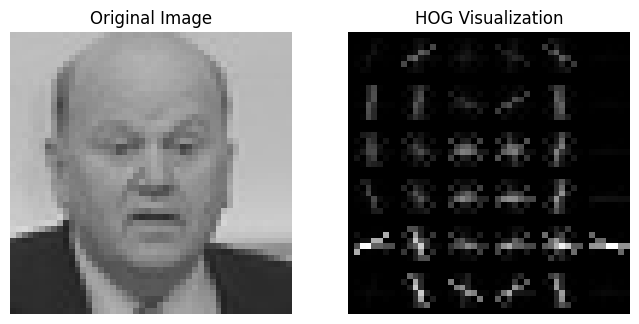

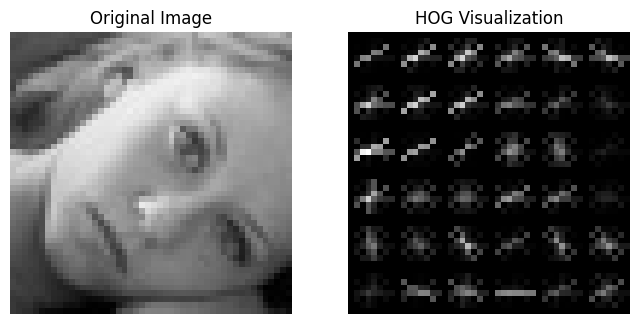

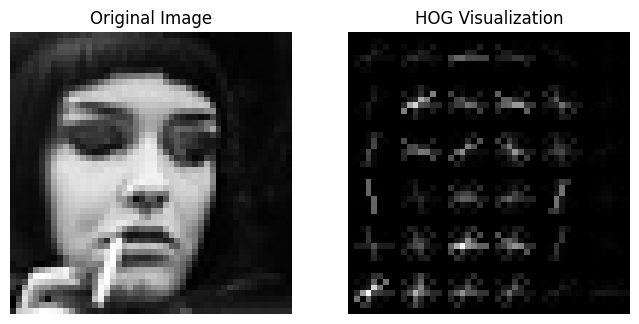

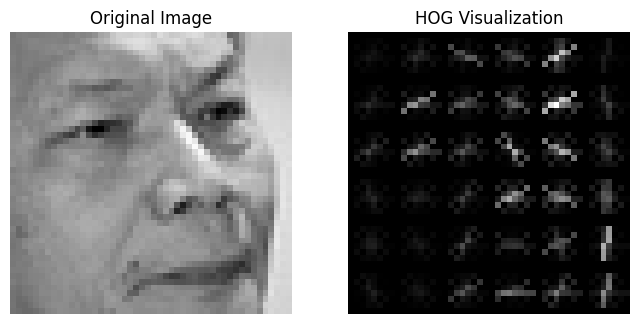

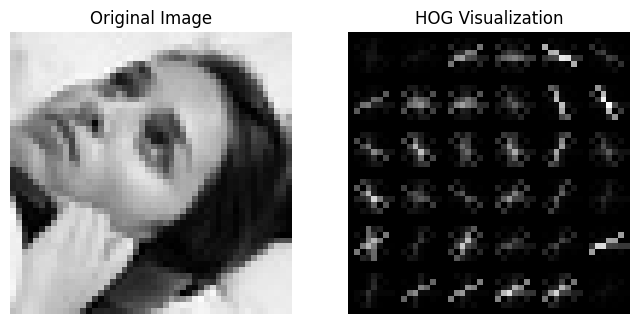

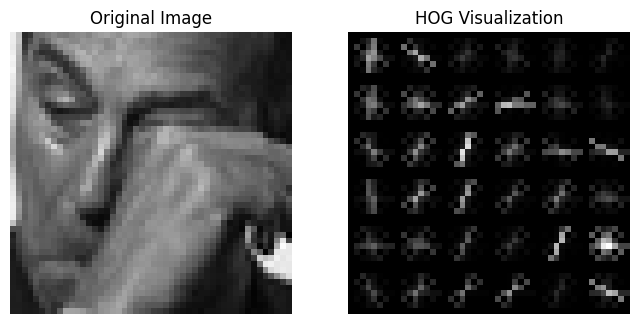

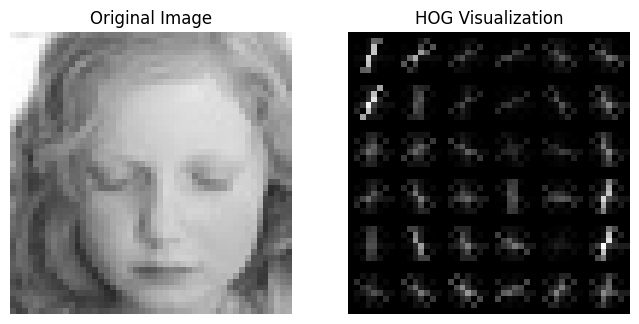

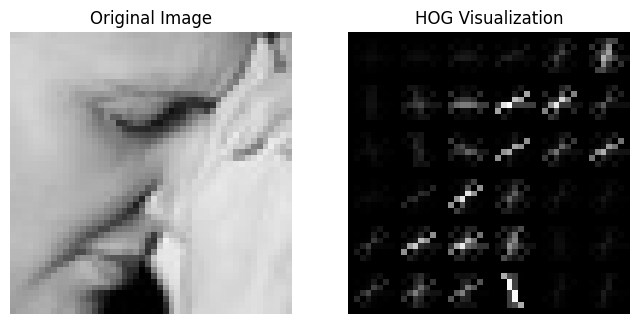

In [ ]:
# Visualize HOG features for the first 10 images
for i, emotion in enumerate(emotions):
    emotion_path = os.path.join(dataset_path, 'train', emotion)
    img_names = os.listdir(emotion_path)

    # Display only 10 images
    for j, img_name in enumerate(img_names[:10]):
        img_path = os.path.join(emotion_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            # Extract HOG features and HOG visualization
            features, hog_image = extract_hog_features(img, visualize=True)

            # Display the original image and HOG visualization side by side
            plt.figure(figsize=(8, 4))

            # Original image
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')

            # HOG visualization
            plt.subplot(1, 2, 2)
            plt.imshow(hog_image, cmap='gray')
            plt.title('HOG Visualization')
            plt.axis('off')

            plt.show()

        # Stop after visualizing 10 images
        if j == 9:
            break


Training the Random Forest Classifier...
Classification Report:
              precision    recall  f1-score   support

       happy       0.76      0.87      0.81      1767
         sad       0.77      0.60      0.67      1247

    accuracy                           0.76      3014
   macro avg       0.76      0.74      0.74      3014
weighted avg       0.76      0.76      0.75      3014

Accuracy: 75.88%


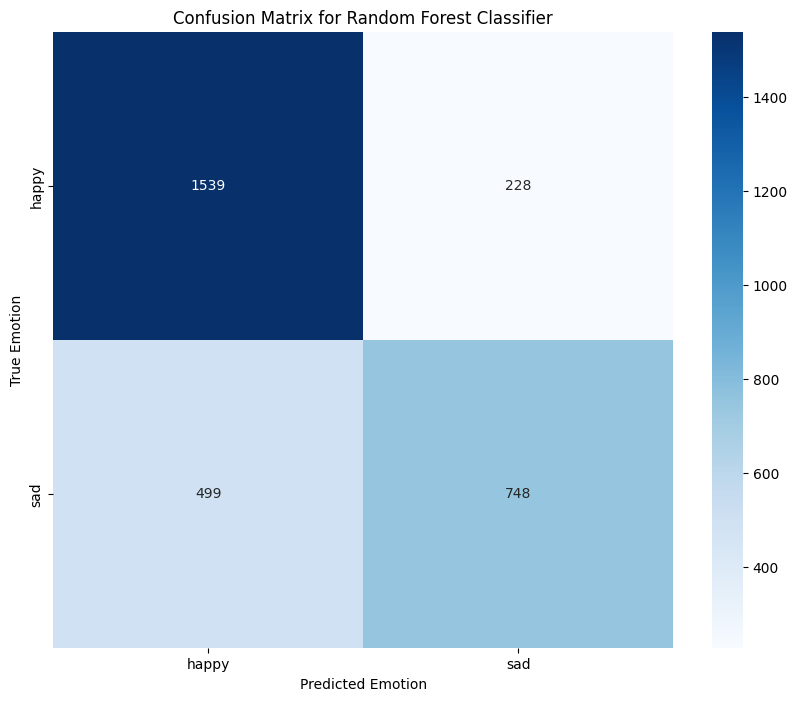

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Random Forest Classifier
print("Training the Random Forest Classifier...")
rf.fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


SVM RBF Accuracy: 81.62%
Classification Report:
              precision    recall  f1-score   support

       happy       0.84      0.85      0.84      1767
         sad       0.79      0.76      0.77      1247

    accuracy                           0.82      3014
   macro avg       0.81      0.81      0.81      3014
weighted avg       0.82      0.82      0.82      3014



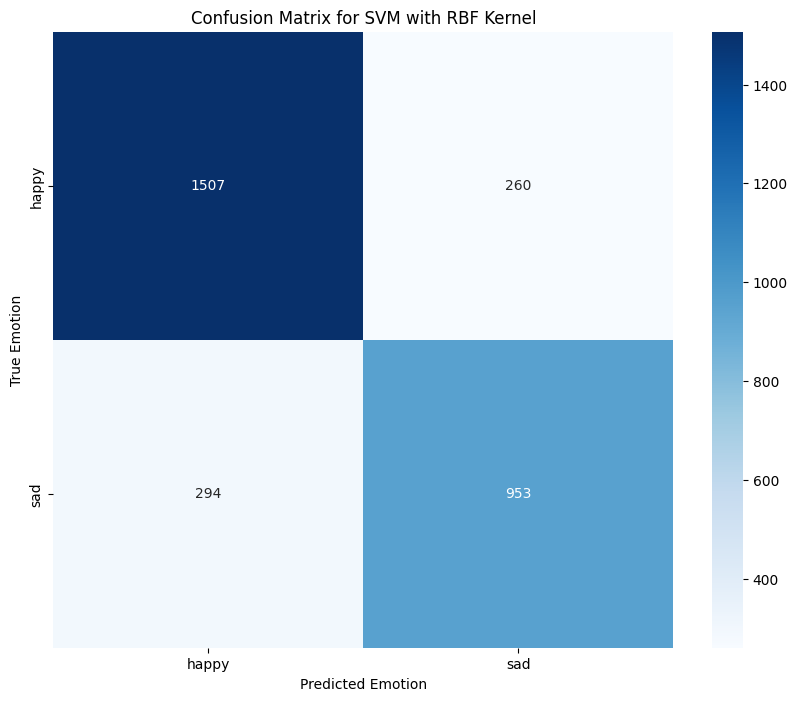

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train an SVM classifier with RBF kernel
svm_rbf_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_rbf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM RBF Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Define the parameter grid for C
param_grid = {'C': [0.1, 1, 10, 100, 1000]}  # Add more values to experiment if needed

# Create a StratifiedKFold object for 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_c = grid_search.best_params_['C']
print(f"Best C value: {best_c}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C value: 10


In [ ]:
# Train the SVM classifier with the best C value
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_rbf_best = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm_rbf_best.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_rbf_best.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM RBF Accuracy with Best C: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM RBF Accuracy with Best C: 83.24%
Classification Report:
              precision    recall  f1-score   support

       happy       0.86      0.86      0.86      1767
         sad       0.80      0.79      0.80      1247

    accuracy                           0.83      3014
   macro avg       0.83      0.83      0.83      3014
weighted avg       0.83      0.83      0.83      3014



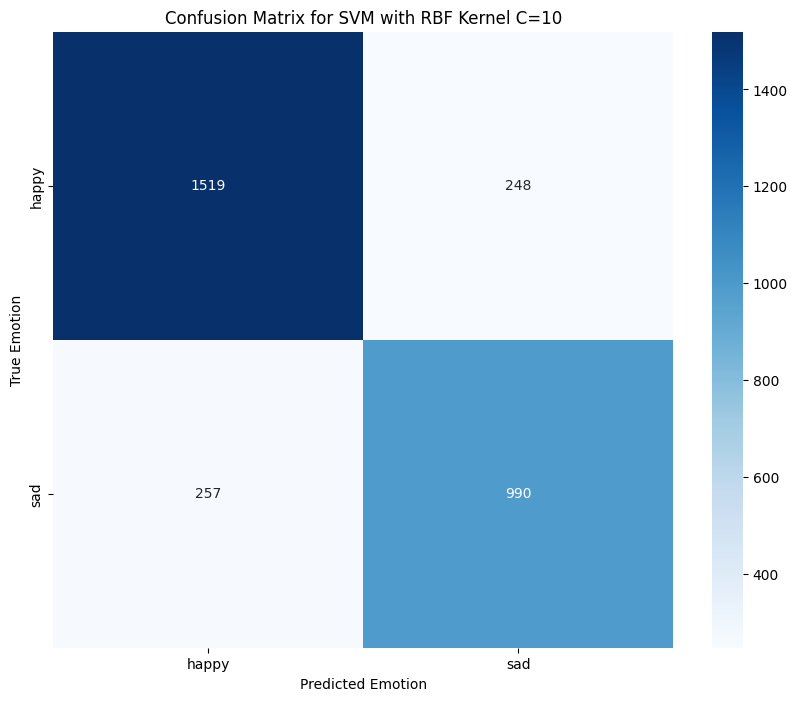

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix for SVM with RBF Kernel C=10")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

KNN Accuracy: 74.59%
KNN Classification Report:
              precision    recall  f1-score   support

       happy       0.72      0.93      0.81      1767
         sad       0.82      0.49      0.62      1247

    accuracy                           0.75      3014
   macro avg       0.77      0.71      0.71      3014
weighted avg       0.76      0.75      0.73      3014



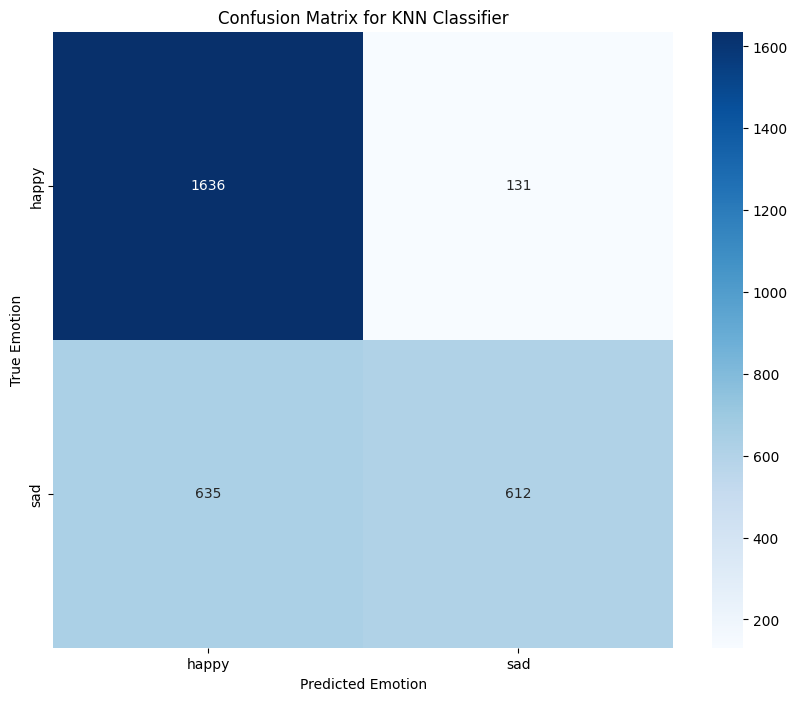

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Train a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


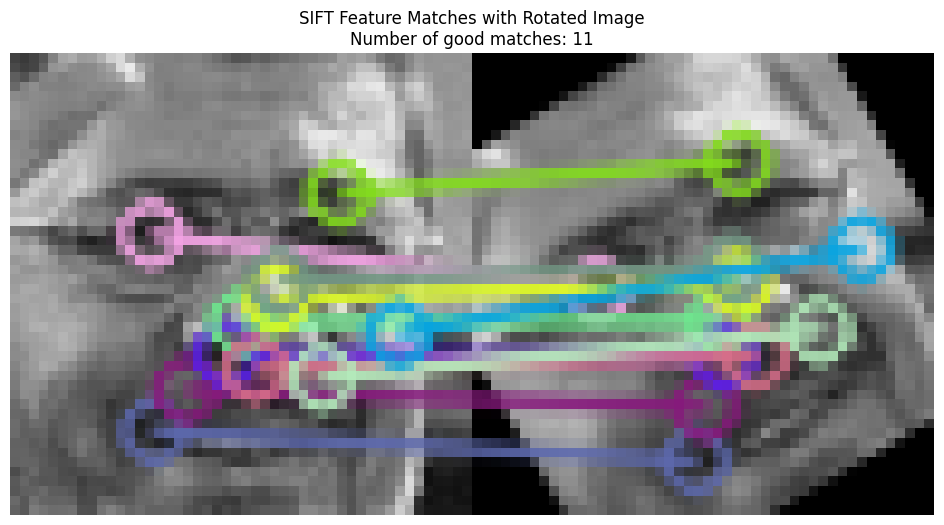

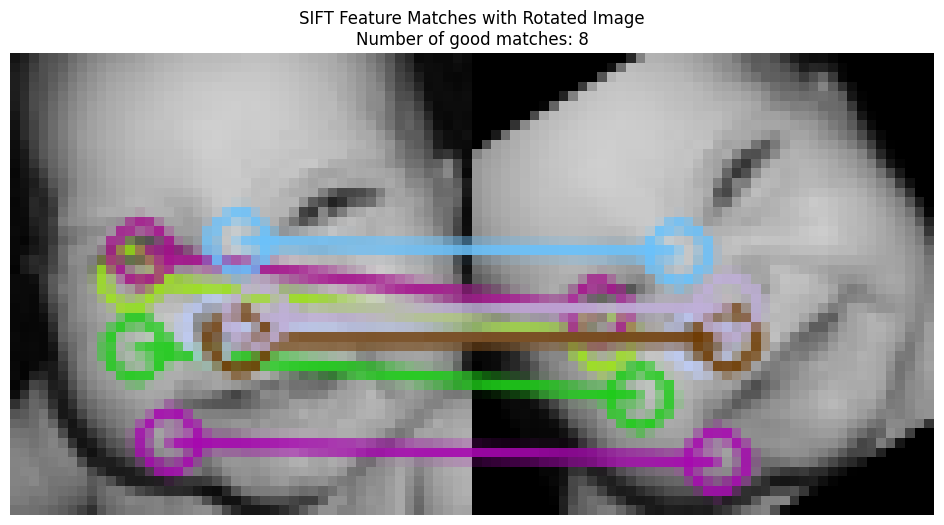

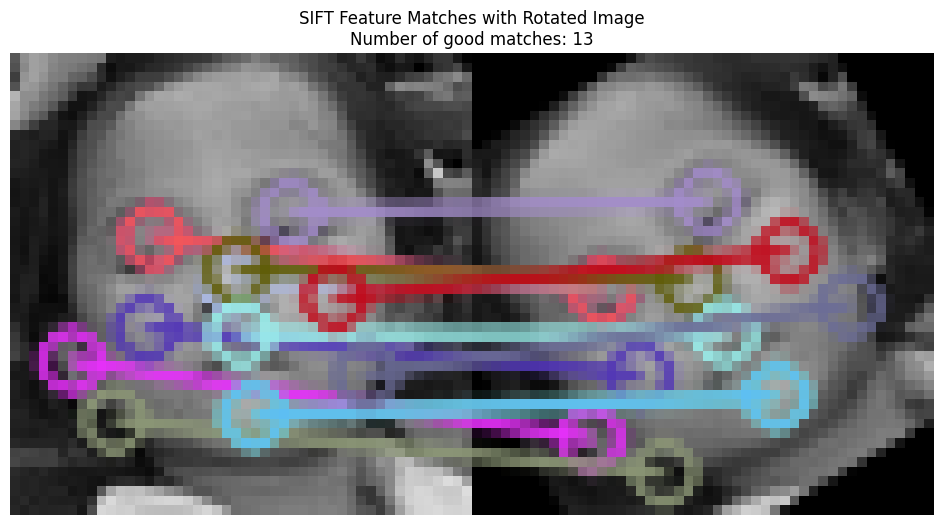

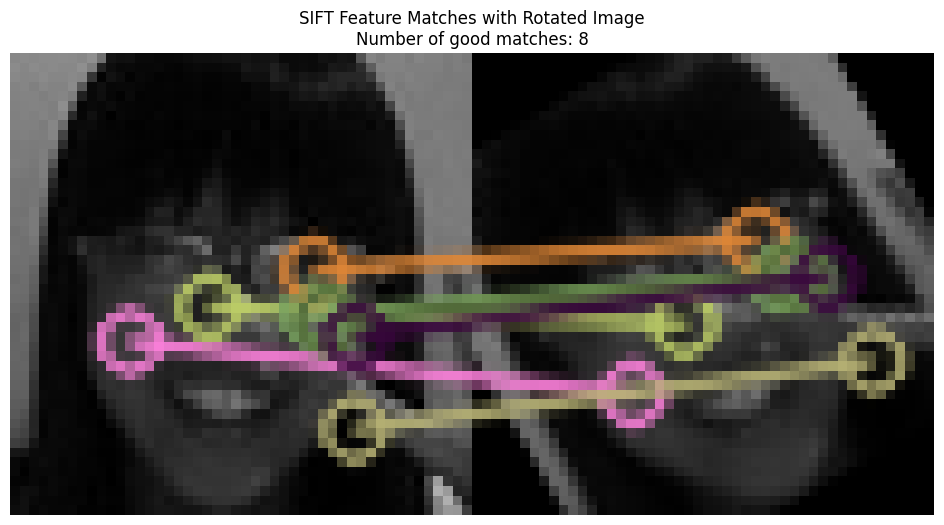

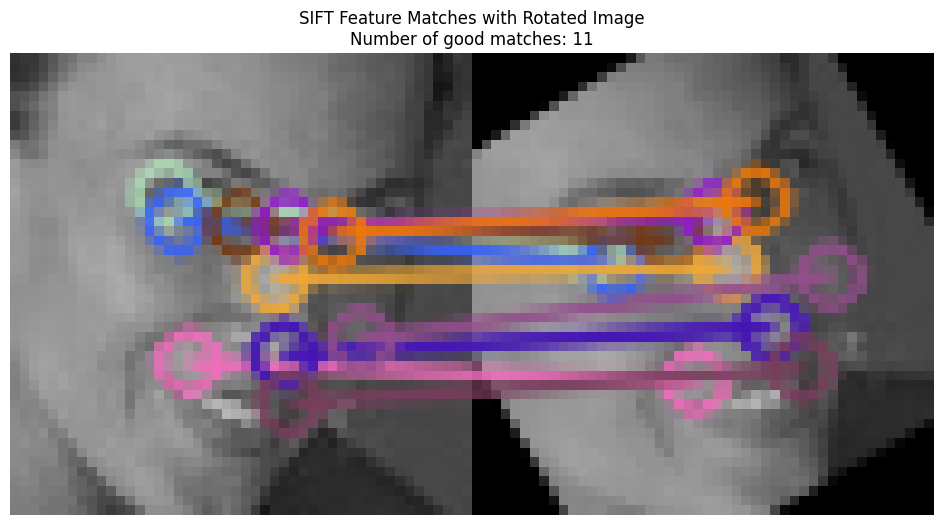

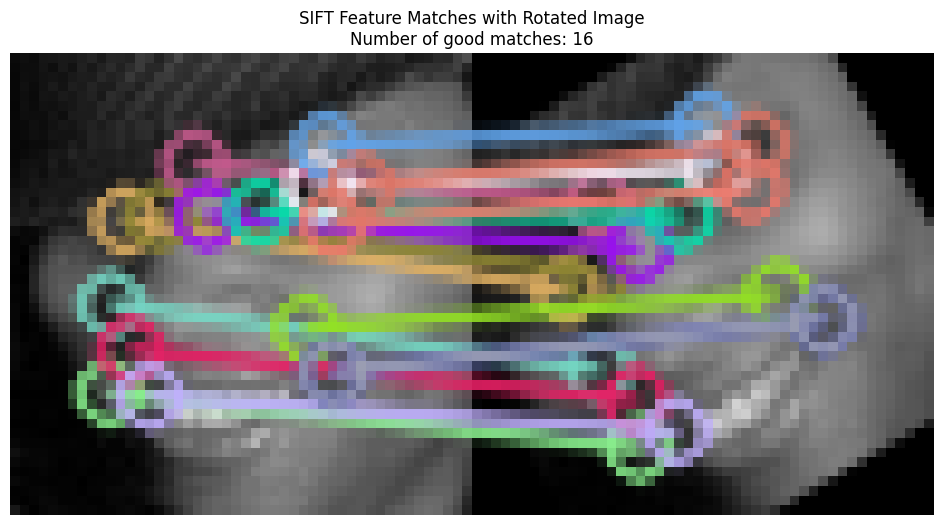

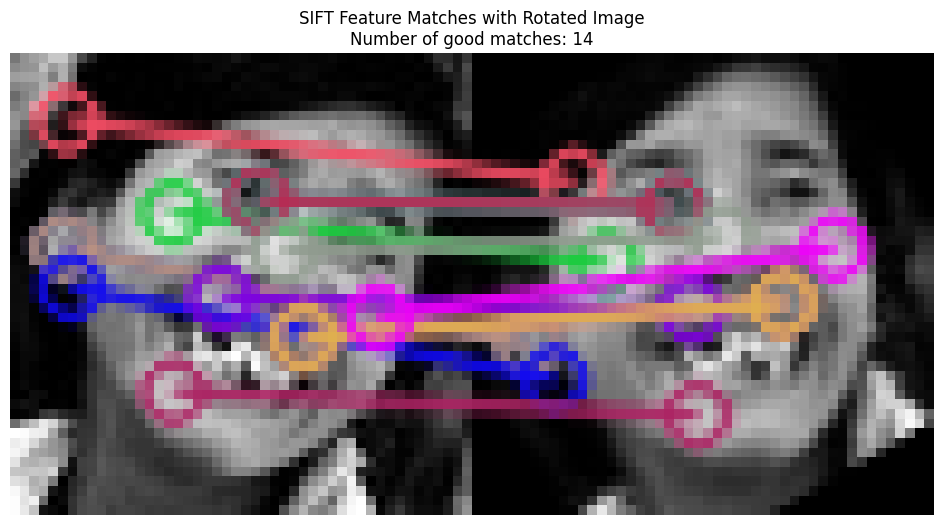

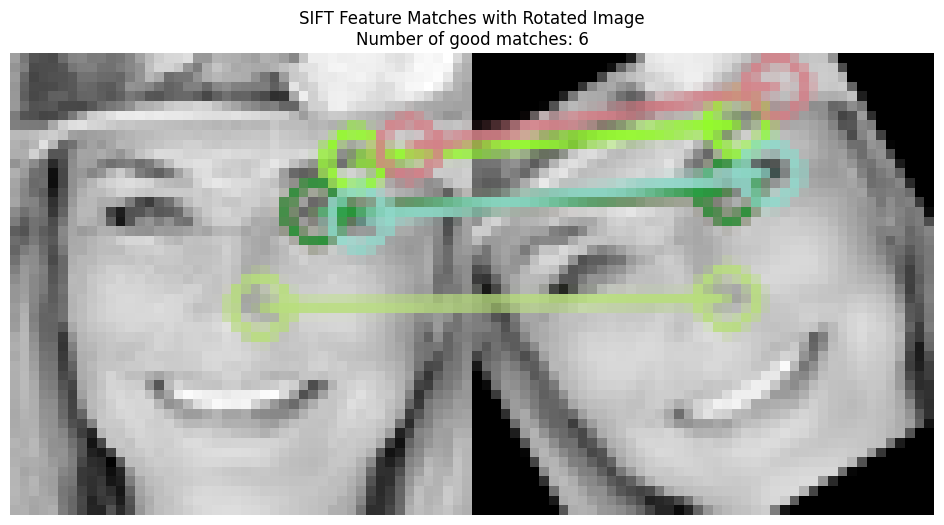

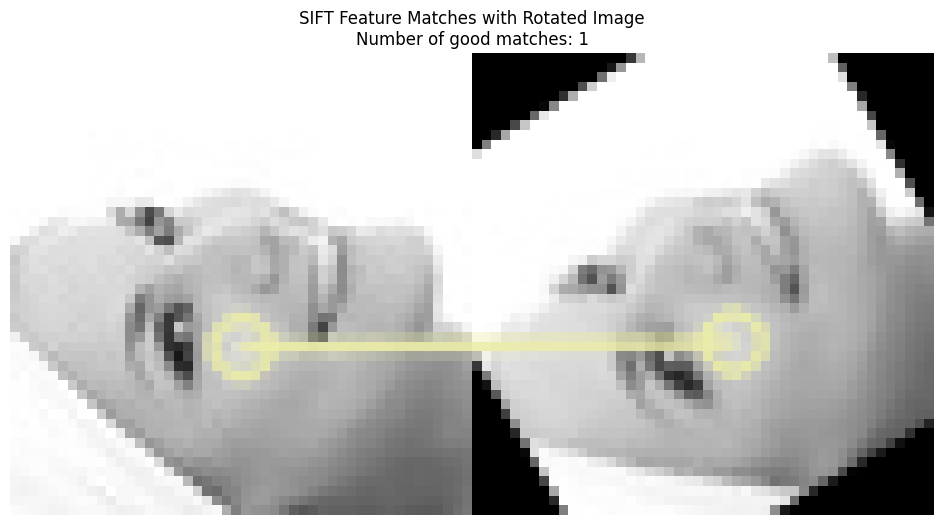

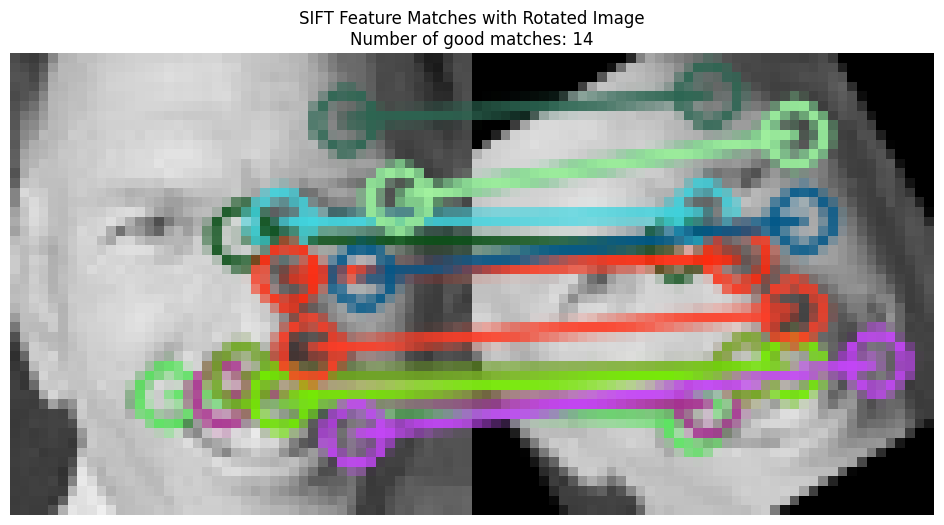

In [ ]:
#SIFT Visualizations

import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Dataset path
dataset_path = '/content/FER2013_happy_sad'  # Update with your dataset path
emotions = ['happy', 'sad']  # Emotion labels

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Function to rotate an image
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated

# Function to visualize matches between original and rotated images
def visualize_matches(image, rotation_angle=30):
    # Convert to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Rotate the image
    rotated_img = rotate_image(image, rotation_angle)
    gray_rotated = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)

    # Detect keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(gray_img, None)
    kp2, des2 = sift.detectAndCompute(gray_rotated, None)

    # Match descriptors using Brute Force Matcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test to find good matches
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    # Draw matches
    matched_img = cv2.drawMatches(image, kp1, rotated_img, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Plot the matches
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title(f'SIFT Feature Matches with Rotated Image\nNumber of good matches: {len(good_matches)}')
    plt.axis('off')
    plt.show()

# Collect 10 random images from the dataset
image_paths = []
for set_folder in ['train', 'test']:
    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, set_folder, emotion)
        image_paths.extend([os.path.join(emotion_path, file) for file in os.listdir(emotion_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Select the first 10 images
selected_images = image_paths[:10]

# Visualize matches for the selected images
for img_path in selected_images:
    img = cv2.imread(img_path)
    if img is not None:
        visualize_matches(img, rotation_angle=30)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Paths to the dataset
dataset_path = '/content/FER2013_happy_sad'  # Update with your dataset path
emotions = ['happy','sad']  # Emotion labels

# Function to extract SIFT features
def extract_sift_features(image):
    # Convert to grayscale if necessary
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors

# Data lists for all images
X = []
y = []

# Step 1: Extract SIFT descriptors for all images in train and test folders
for set_folder in ['train', 'test']:
    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, set_folder, emotion)
        for img_name in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                descriptors = extract_sift_features(img)
                if descriptors is not None:
                    X.append(descriptors)  # Store descriptors for BoVW
                    y.append(emotion)

print(f"Extracted SIFT descriptors for {len(X)} images.")

# Step 2: Flatten all descriptors into a single list for clustering
all_descriptors = np.vstack([des for des in X if des is not None])

# Define the number of clusters for the visual vocabulary
num_clusters = 100  # Adjust based on experiment

# Step 3: Perform KMeans clustering to create a visual vocabulary
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(all_descriptors)
print("KMeans clustering completed to create visual words.")

# Step 4: Build histograms of visual words for each image
def build_histogram(descriptors, kmeans_model):
    # Assign each descriptor to the nearest cluster center (visual word)
    words, _ = vq(descriptors, kmeans_model.cluster_centers_)
    # Create a normalized histogram of visual words
    histogram, _ = np.histogram(words, bins=np.arange(num_clusters + 1), density=True)
    return histogram

# Convert all descriptors in X to fixed-length histograms (BoVW representation)
X_bovw = []
for descriptors in X:
    if descriptors is not None:
        histogram = build_histogram(descriptors, kmeans)
        X_bovw.append(histogram)

# Convert X_bovw to a NumPy array and y to an array
X_bovw = np.array(X_bovw)
y = np.array(y)

# Step 5: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_bovw, y, test_size=0.2, random_state=42)

# Optional: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



Extracted SIFT descriptors for 15063 images.
KMeans clustering completed to create visual words.
Training set size: 12050 samples
Testing set size: 3013 samples


In [ ]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 61.60%
Classification Report:
              precision    recall  f1-score   support

       happy       0.62      0.91      0.74      1789
         sad       0.59      0.18      0.28      1224

    accuracy                           0.62      3013
   macro avg       0.60      0.55      0.51      3013
weighted avg       0.61      0.62      0.55      3013



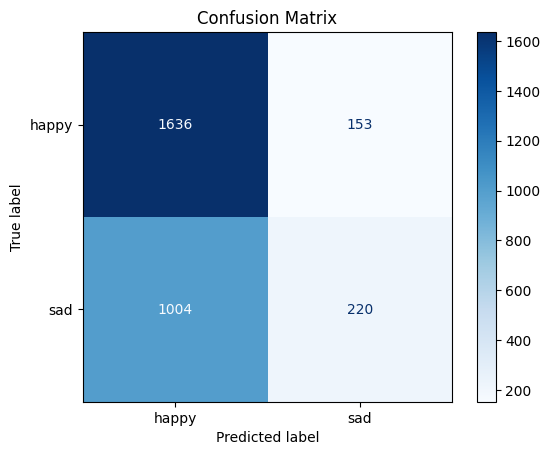

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=svm_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



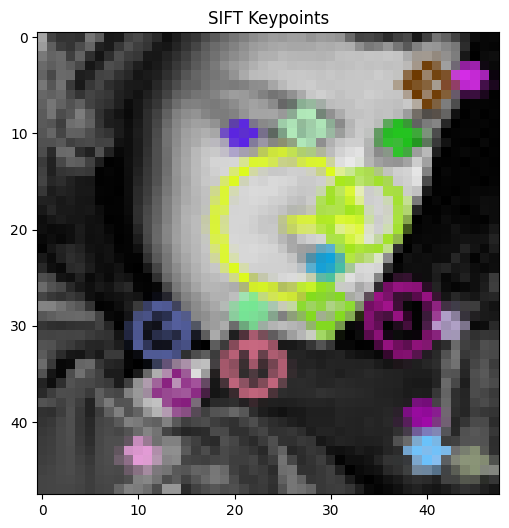

In [ ]:
# Example: Visualize the SIFT keypoints on a sample image
sample_img = cv2.imread(img_path)
keypoints, descriptors = sift.detectAndCompute(cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY), None)
img_with_keypoints = cv2.drawKeypoints(sample_img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with SIFT keypoints
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

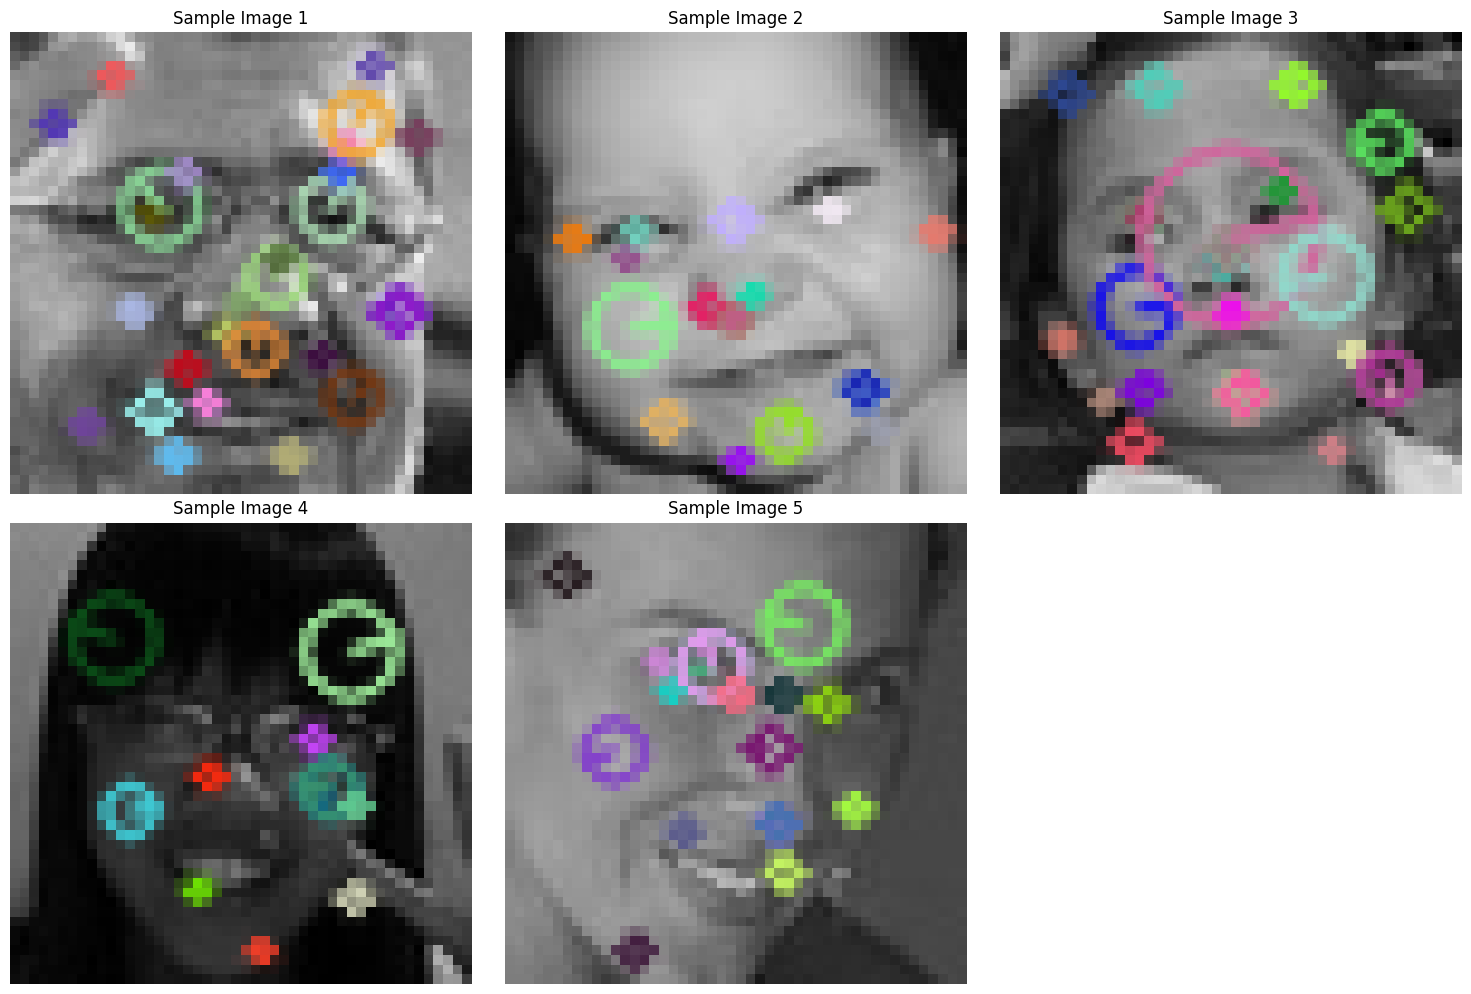

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Define the dataset path and emotion folder (e.g., 'happy' in 'train')
dataset_path = '/content/FER2013_happy_sad'  # Update with your dataset path
emotion_folder = os.path.join(dataset_path, 'train', 'happy')  # Path to 'happy' folder in 'train'

# Collect the first 5 images from the specified folder
image_files = [os.path.join(emotion_folder, file) for file in os.listdir(emotion_folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
selected_images = image_files[:5]  # Select the first 5 images

# Display SIFT keypoints for the selected images
plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility

sift = cv2.SIFT_create()  # Ensure SIFT is initialized

for i, img_path in enumerate(selected_images):
    # Read and process the image
    sample_img = cv2.imread(img_path)
    if sample_img is None:
        print(f"Could not load image at {img_path}")
        continue

    gray_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)

    # Detect keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)

    # Draw keypoints on the image
    img_with_keypoints = cv2.drawKeypoints(sample_img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Plot each image with its keypoints
    plt.subplot(2, 3, i + 1)  # Arrange plots in a grid (2 rows, 3 columns)
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample Image {i + 1}')
    plt.axis('off')  # Remove axis for better visualization

plt.tight_layout()
plt.show()



SVM RBF Accuracy: 63.86%
Classification Report:
              precision    recall  f1-score   support

       happy       0.65      0.86      0.74      1789
         sad       0.60      0.32      0.42      1224

    accuracy                           0.64      3013
   macro avg       0.63      0.59      0.58      3013
weighted avg       0.63      0.64      0.61      3013



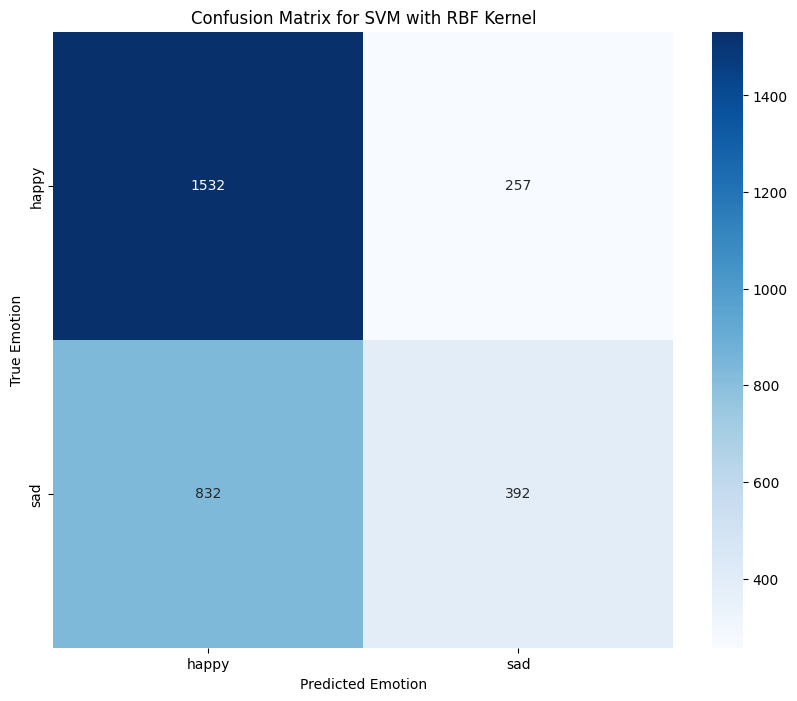

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train an SVM classifier with RBF kernel
svm_rbf_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_rbf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM RBF Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Define the parameter grid for C
param_grid = {'C': [0.1, 1, 10, 100, 1000]}  # Add more values to experiment if needed

# Create a StratifiedKFold object for 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_c = grid_search.best_params_['C']
print(f"Best C value: {best_c}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C value: 1


Training the Random Forest Classifier...
Classification Report:
              precision    recall  f1-score   support

       happy       0.64      0.90      0.75      1789
         sad       0.63      0.25      0.36      1224

    accuracy                           0.64      3013
   macro avg       0.63      0.57      0.55      3013
weighted avg       0.63      0.64      0.59      3013

Accuracy: 63.52%


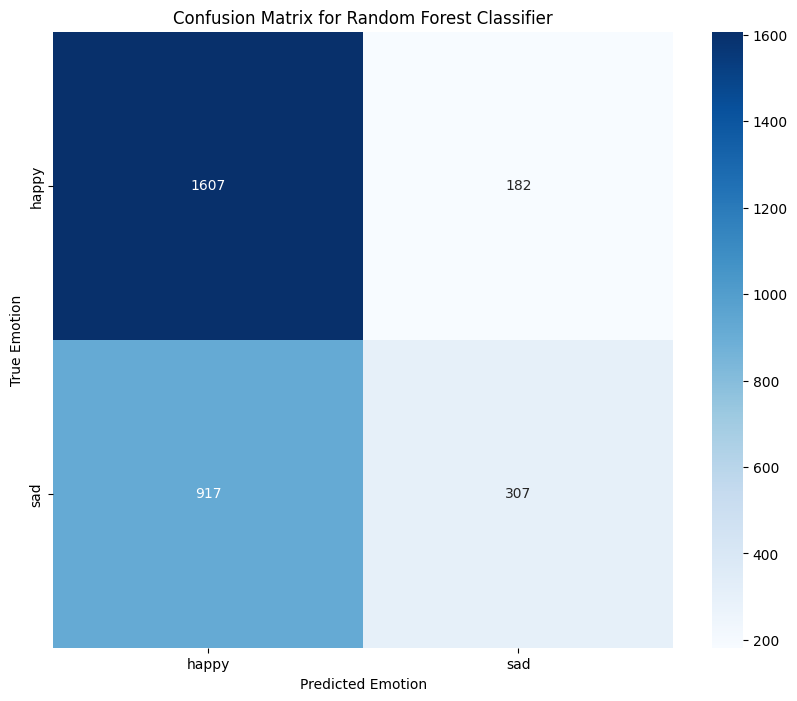

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Random Forest Classifier
print("Training the Random Forest Classifier...")
rf.fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


Extracted SIFT descriptors for 15063 images.
KMeans clustering completed to create visual words.
Training set size: 12050 samples
Testing set size: 3013 samples
KNN Accuracy: 60.17%
KNN Classification Report:
              precision    recall  f1-score   support

       happy       0.64      0.75      0.69      1789
         sad       0.51      0.38      0.44      1224

    accuracy                           0.60      3013
   macro avg       0.58      0.57      0.56      3013
weighted avg       0.59      0.60      0.59      3013



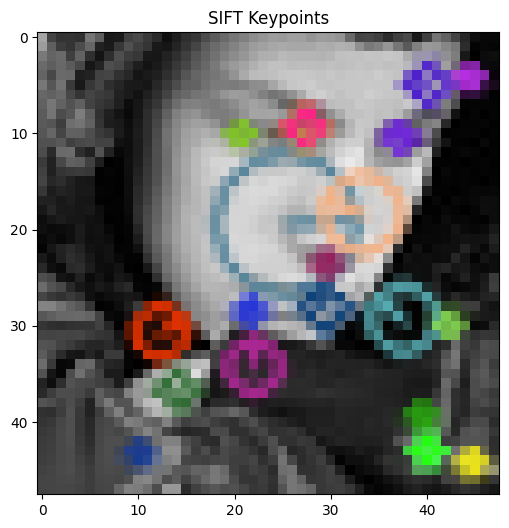

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Paths to the dataset
dataset_path = '/content/FER2013_happy_sad'  # Update with your dataset path
emotions = ['happy', 'sad']  # Emotion labels

# Function to extract SIFT features
def extract_sift_features(image):
    # Convert to grayscale if necessary
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors

# Data lists for all images
X = []
y = []

# Step 1: Extract SIFT descriptors for all images in train and test folders
for set_folder in ['train', 'test']:
    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, set_folder, emotion)
        for img_name in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                descriptors = extract_sift_features(img)
                if descriptors is not None:
                    X.append(descriptors)  # Store descriptors for BoVW
                    y.append(emotion)

print(f"Extracted SIFT descriptors for {len(X)} images.")

# Step 2: Flatten all descriptors into a single list for clustering
all_descriptors = np.vstack([des for des in X if des is not None])

# Define the number of clusters for the visual vocabulary
num_clusters = 100  # Adjust based on experiment

# Step 3: Perform KMeans clustering to create a visual vocabulary
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(all_descriptors)
print("KMeans clustering completed to create visual words.")

# Step 4: Build histograms of visual words for each image
def build_histogram(descriptors, kmeans_model):
    # Assign each descriptor to the nearest cluster center (visual word)
    words, _ = vq(descriptors, kmeans_model.cluster_centers_)
    # Create a normalized histogram of visual words
    histogram, _ = np.histogram(words, bins=np.arange(num_clusters + 1), density=True)
    return histogram

# Convert all descriptors in X to fixed-length histograms (BoVW representation)
X_bovw = []
for descriptors in X:
    if descriptors is not None:
        histogram = build_histogram(descriptors, kmeans)
        X_bovw.append(histogram)

# Convert X_bovw to a NumPy array and y to an array
X_bovw = np.array(X_bovw)
y = np.array(y)

# Step 5: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_bovw, y, test_size=0.2, random_state=42)

# Optional: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Train a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

# Example: Visualize the SIFT keypoints on a sample image
sample_img = cv2.imread(img_path)
keypoints, descriptors = sift.detectAndCompute(cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY), None)
img_with_keypoints = cv2.drawKeypoints(sample_img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with SIFT keypoints
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()


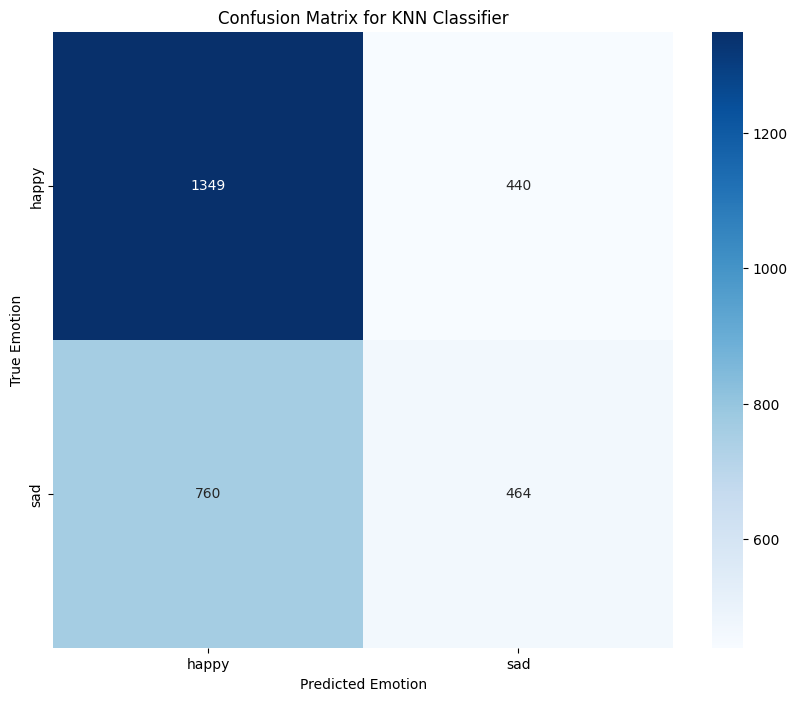

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


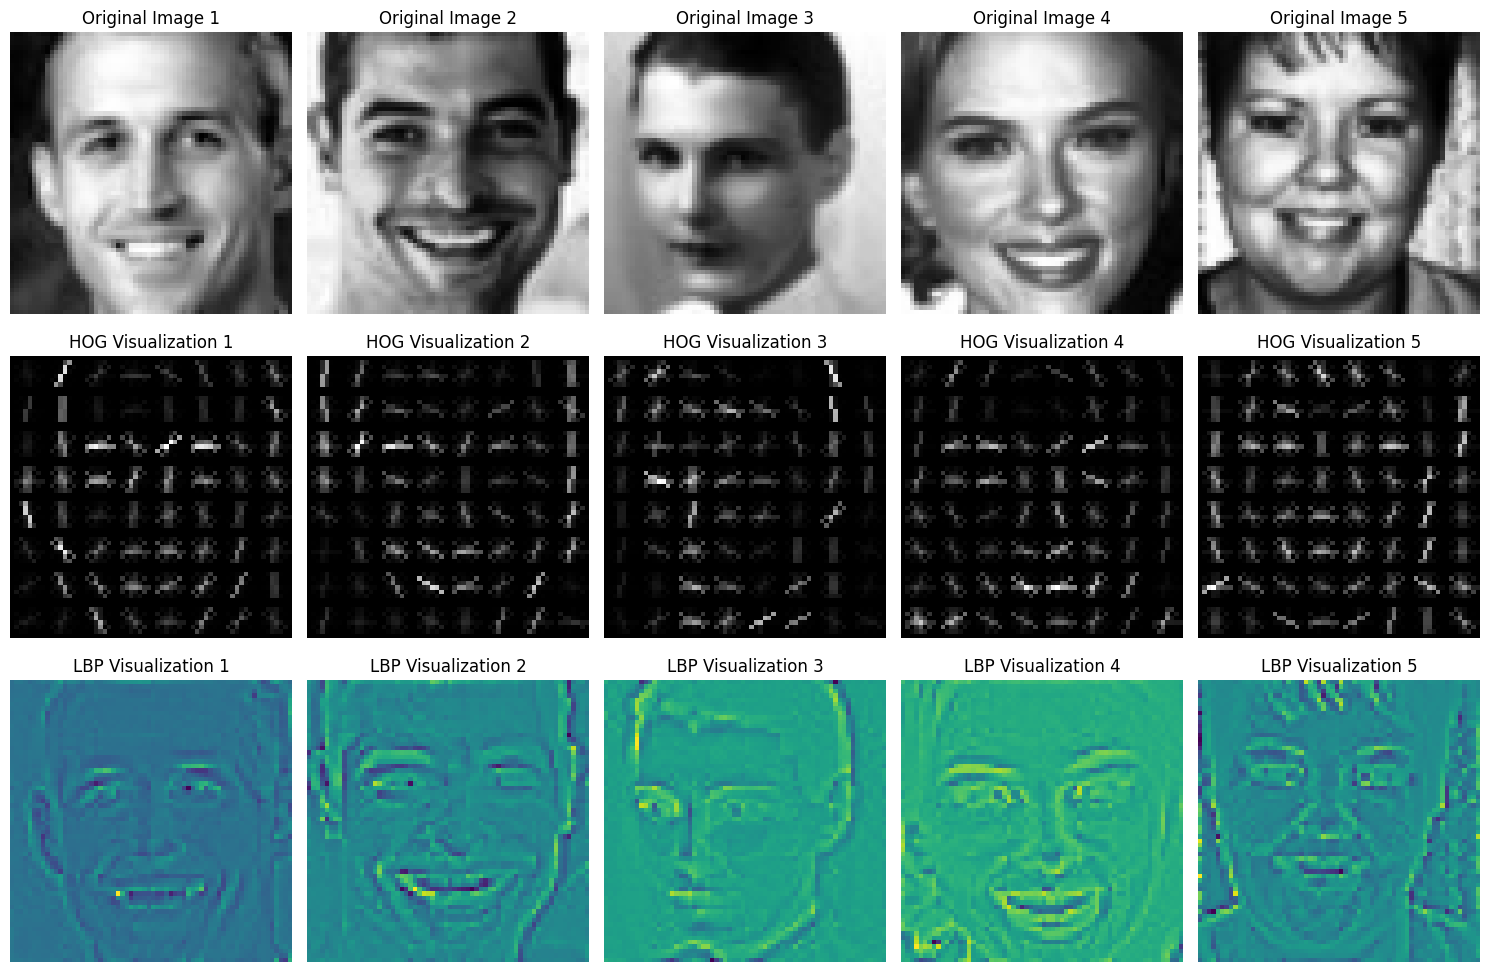

In [6]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preprocessing function
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    resized_img = cv2.resize(gray, (64, 64))
    return resized_img

# Extract HOG features with LBP combined
def extract_features(images):
    features = []
    hog_visualizations = []  # Store HOG visualizations for visualization
    for img in images:
        img_preprocessed = preprocess_image(img)

        # HOG feature extraction
        hog_features, hog_image = hog(img_preprocessed, orientations=9, pixels_per_cell=(8, 8),
                                      cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)

        # LBP feature extraction (example using Laplacian variance for simplicity)
        lbp = cv2.Laplacian(img_preprocessed, cv2.CV_64F).var()

        # Combine features
        combined_features = np.hstack((hog_features, [lbp]))
        features.append(combined_features)
        hog_visualizations.append(hog_image)

    return np.array(features), hog_visualizations

# Function to load and preprocess all images in the dataset
def load_images_from_directory(directory):
    images = []
    labels = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)

                    # Extract label from the folder structure
                    label = os.path.basename(os.path.dirname(img_path))
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data
train_path = '/content/FER2013_happy_sad/train'
test_path = '/content/FER2013_happy_sad/test'

# Load images from train and test folders
X_train_images, y_train = load_images_from_directory(train_path)
X_test_images, y_test = load_images_from_directory(test_path)

# Combine train and test images for visualization purposes
X_images = np.concatenate((X_train_images, X_test_images), axis=0)

# Display a few HOG and LBP visualizations
plt.figure(figsize=(15, 10))
for i in range(5):  # Display first 5 images
    img_preprocessed = preprocess_image(X_images[i])
    hog_features, hog_image = hog(img_preprocessed, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    lbp_feature = cv2.Laplacian(img_preprocessed, cv2.CV_64F)

    # Display the original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(img_preprocessed, cmap='gray')
    plt.title(f"Original Image {i + 1}")
    plt.axis('off')

    # Display the HOG visualization
    plt.subplot(3, 5, i + 6)
    plt.imshow(hog_image, cmap='gray')
    plt.title(f"HOG Visualization {i + 1}")
    plt.axis('off')

    # Display the LBP visualization
    plt.subplot(3, 5, i + 11)
    plt.imshow(lbp_feature, cmap='viridis')
    plt.title(f"LBP Visualization {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


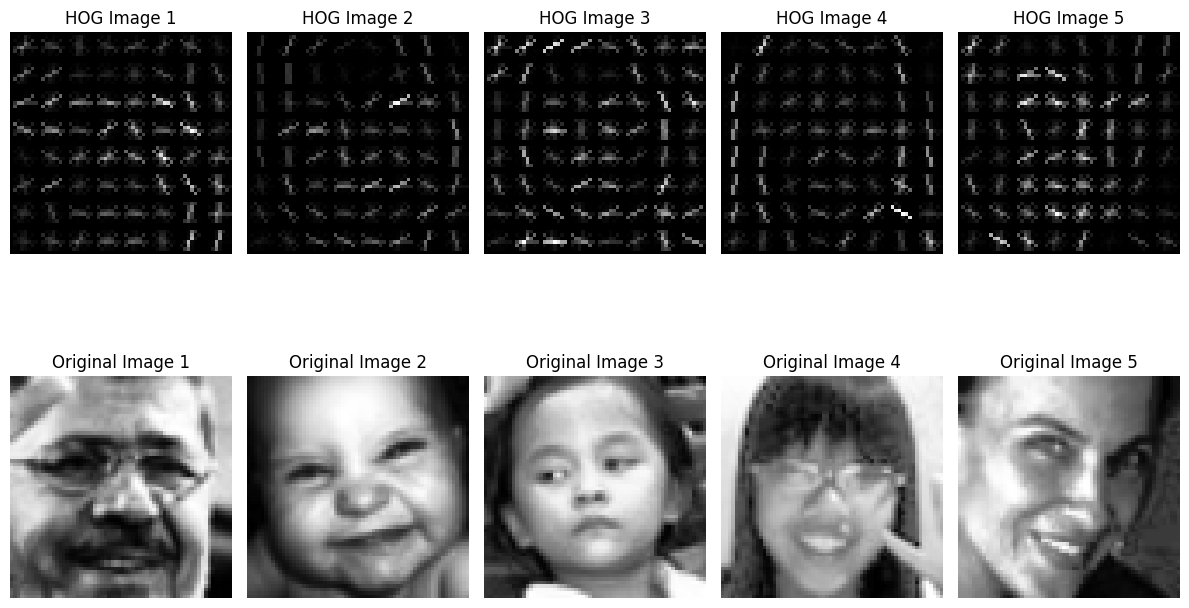

SVM with RBF Kernel Accuracy: 82.25%
Classification Report:
              precision    recall  f1-score   support

       happy       0.84      0.87      0.85      1798
         sad       0.80      0.75      0.77      1216

    accuracy                           0.82      3014
   macro avg       0.82      0.81      0.81      3014
weighted avg       0.82      0.82      0.82      3014



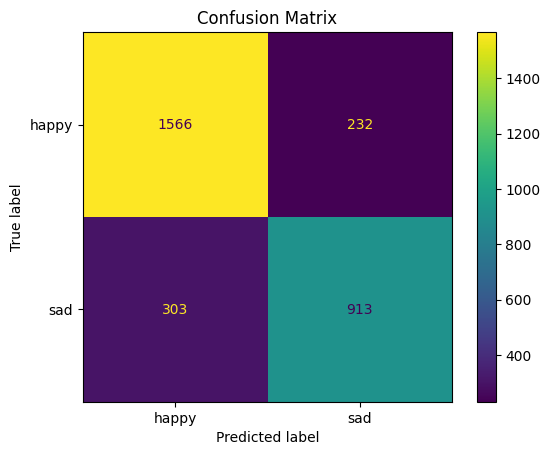

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preprocessing function
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    resized_img = cv2.resize(gray, (64, 64))
    return resized_img

# Extract HOG features with LBP combined
def extract_features(images):
    features = []
    hog_visualizations = []  # Store HOG visualizations for visualization
    for img in images:
        img_preprocessed = preprocess_image(img)

        # HOG feature extraction
        hog_features, hog_image = hog(img_preprocessed, orientations=9, pixels_per_cell=(8, 8),
                                      cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)

        # LBP feature extraction (example using Laplacian variance for simplicity)
        lbp = cv2.Laplacian(img_preprocessed, cv2.CV_64F).var()

        # Combine features
        combined_features = np.hstack((hog_features, [lbp]))
        features.append(combined_features)
        hog_visualizations.append(hog_image)

    return np.array(features), hog_visualizations

# Function to load and preprocess all images in the dataset
def load_images_from_directory(directory):
    images = []
    labels = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)

                    # Extract label from the folder structure
                    label = os.path.basename(os.path.dirname(img_path))
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data
train_path = '/content/FER2013_happy_sad/train'
test_path = '/content/FER2013_happy_sad/test'

X_train_images, y_train = load_images_from_directory(train_path)
X_test_images, y_test = load_images_from_directory(test_path)

X = np.concatenate((X_train_images, X_test_images), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Extract features and visualizations
X_features, hog_visualizations = extract_features(X)

# Display a few HOG visualizations
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(hog_visualizations[i], cmap='gray')
    plt.title(f"HOG Image {i+1}")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(preprocess_image(X[i]), cmap='gray')
    plt.title(f"Original Image {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with RBF kernel
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM with RBF Kernel Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
disp.plot(cmap='viridis')

plt.title("Confusion Matrix")
plt.show()


SVM with RBF Kernel  C=10 Accuracy: 83.81%
Classification Report:
              precision    recall  f1-score   support

       happy       0.85      0.88      0.87      1798
         sad       0.81      0.78      0.79      1216

    accuracy                           0.84      3014
   macro avg       0.83      0.83      0.83      3014
weighted avg       0.84      0.84      0.84      3014



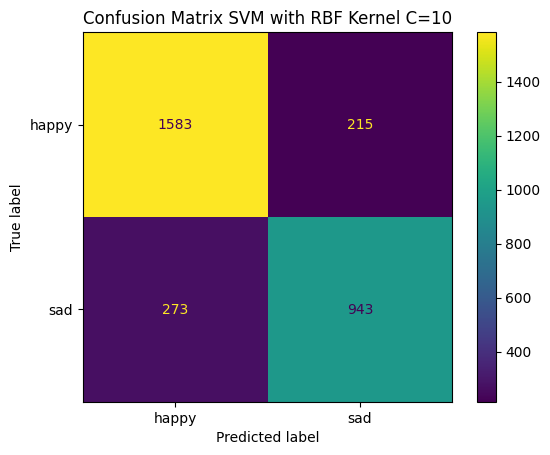

In [ ]:
# Train SVM with RBF kernel
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM with RBF Kernel  C=10 Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
disp.plot(cmap='viridis')

plt.title("Confusion Matrix SVM with RBF Kernel C=10")
plt.show()


Training the Random Forest Classifier...
Classification Report:
              precision    recall  f1-score   support

       happy       0.76      0.87      0.81      1798
         sad       0.76      0.59      0.66      1216

    accuracy                           0.76      3014
   macro avg       0.76      0.73      0.74      3014
weighted avg       0.76      0.76      0.75      3014

Accuracy: 75.88%


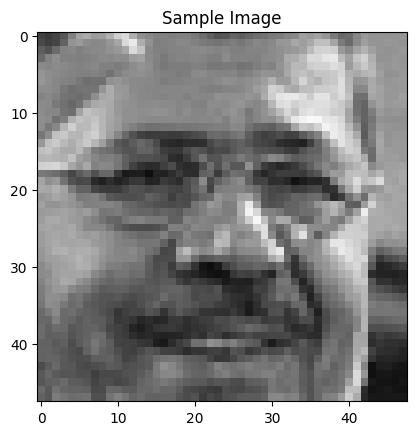

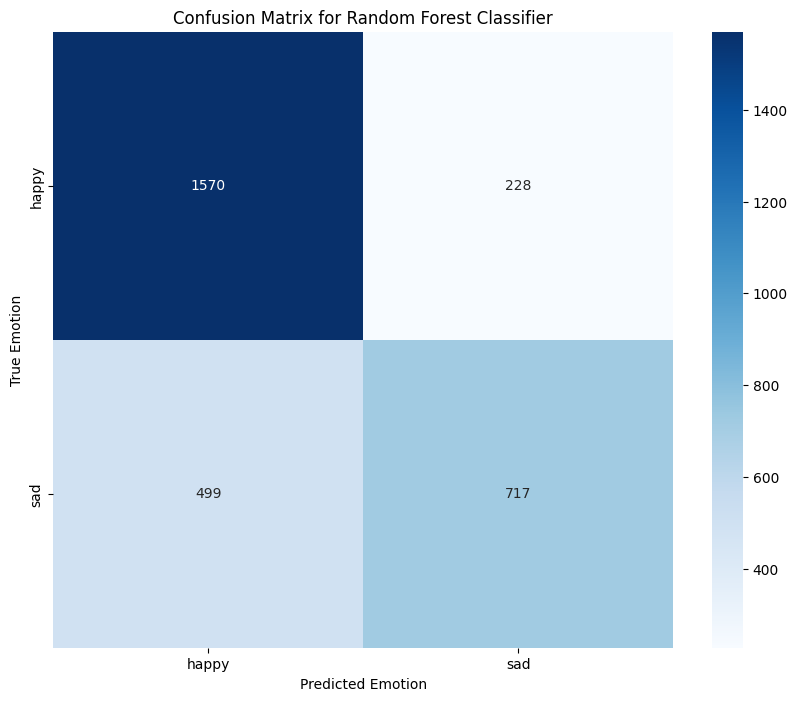

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing function
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    gray = cv2.equalizeHist(gray)

    # Resize to a standard size (e.g., 64x64)
    resized_img = cv2.resize(gray, (64, 64))

    return resized_img

# Extract HOG features with LBP combined
def extract_features(images):
    features = []
    for img in images:
        img_preprocessed = preprocess_image(img)

        # HOG feature extraction
        hog_features, _ = hog(img_preprocessed, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)

        # LBP feature extraction (example using Laplacian variance for simplicity)
        lbp = cv2.Laplacian(img_preprocessed, cv2.CV_64F).var()

        # Combine features
        combined_features = np.hstack((hog_features, [lbp]))
        features.append(combined_features)

    return np.array(features)

# Function to load and preprocess all images in the dataset
def load_images_from_directory(directory):
    images = []
    labels = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)

                    # Extract label from the folder structure (e.g., 'train/happy' -> 'happy')
                    label = os.path.basename(os.path.dirname(img_path))
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load all images and labels from train and test directories
train_path = '/content/FER2013_happy_sad/train'
test_path = '/content/FER2013_happy_sad/test'

X_train_images, y_train = load_images_from_directory(train_path)
X_test_images, y_test = load_images_from_directory(test_path)

# Combine train and test images for feature extraction
X = np.concatenate((X_train_images, X_test_images), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Extract features from the dataset
X_features = extract_features(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Random Forest Classifier
print("Training the Random Forest Classifier...")
rf.fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display a sample image to verify it loaded correctly (optional)
plt.imshow(cv2.cvtColor(X_train_images[0], cv2.COLOR_BGR2RGB))
plt.title('Sample Image')
plt.show()

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


Training the KNN Classifier...
Classification Report:
              precision    recall  f1-score   support

       happy       0.74      0.93      0.82      1798
         sad       0.84      0.51      0.63      1216

    accuracy                           0.76      3014
   macro avg       0.79      0.72      0.73      3014
weighted avg       0.78      0.76      0.75      3014

Accuracy: 76.21%


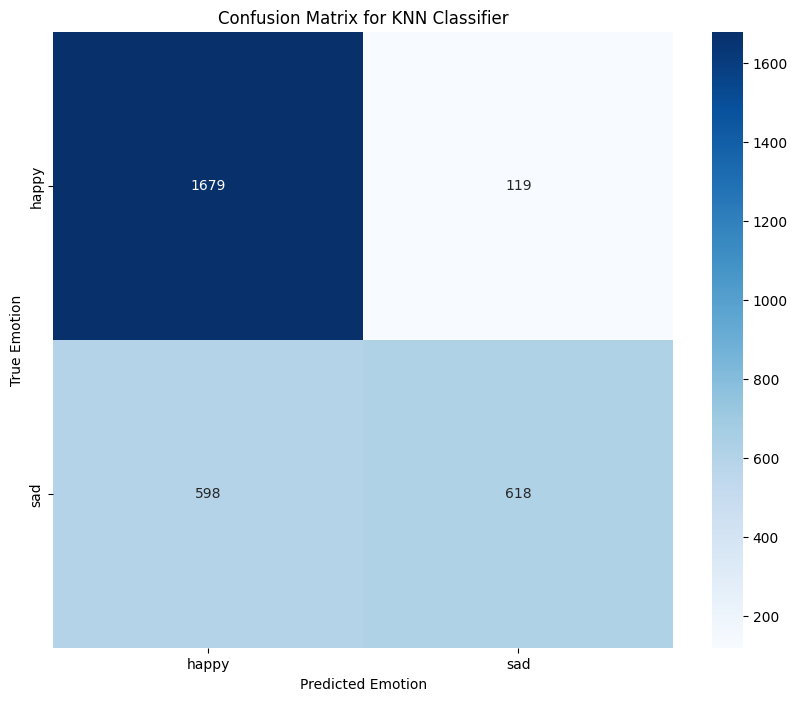

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier  # Import KNN Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing function
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    gray = cv2.equalizeHist(gray)

    # Resize to a standard size (e.g., 64x64)
    resized_img = cv2.resize(gray, (64, 64))

    return resized_img

# Extract HOG features with LBP combined
def extract_features(images):
    features = []
    for img in images:
        img_preprocessed = preprocess_image(img)

        # HOG feature extraction
        hog_features, _ = hog(img_preprocessed, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)

        # LBP feature extraction (example using Laplacian variance for simplicity)
        lbp = cv2.Laplacian(img_preprocessed, cv2.CV_64F).var()

        # Combine features
        combined_features = np.hstack((hog_features, [lbp]))
        features.append(combined_features)

    return np.array(features)

# Function to load and preprocess all images in the dataset
def load_images_from_directory(directory):
    images = []
    labels = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)

                    # Extract label from the folder structure (e.g., 'train/happy' -> 'happy')
                    label = os.path.basename(os.path.dirname(img_path))
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load all images and labels from train and test directories
train_path = '/content/FER2013_happy_sad/train'
test_path = '/content/FER2013_happy_sad/test'

X_train_images, y_train = load_images_from_directory(train_path)
X_test_images, y_test = load_images_from_directory(test_path)

# Combine train and test images for feature extraction
X = np.concatenate((X_train_images, X_test_images), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Extract features from the dataset
X_features = extract_features(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # n_neighbors can be tuned

# Train the KNN Classifier
print("Training the KNN Classifier...")
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


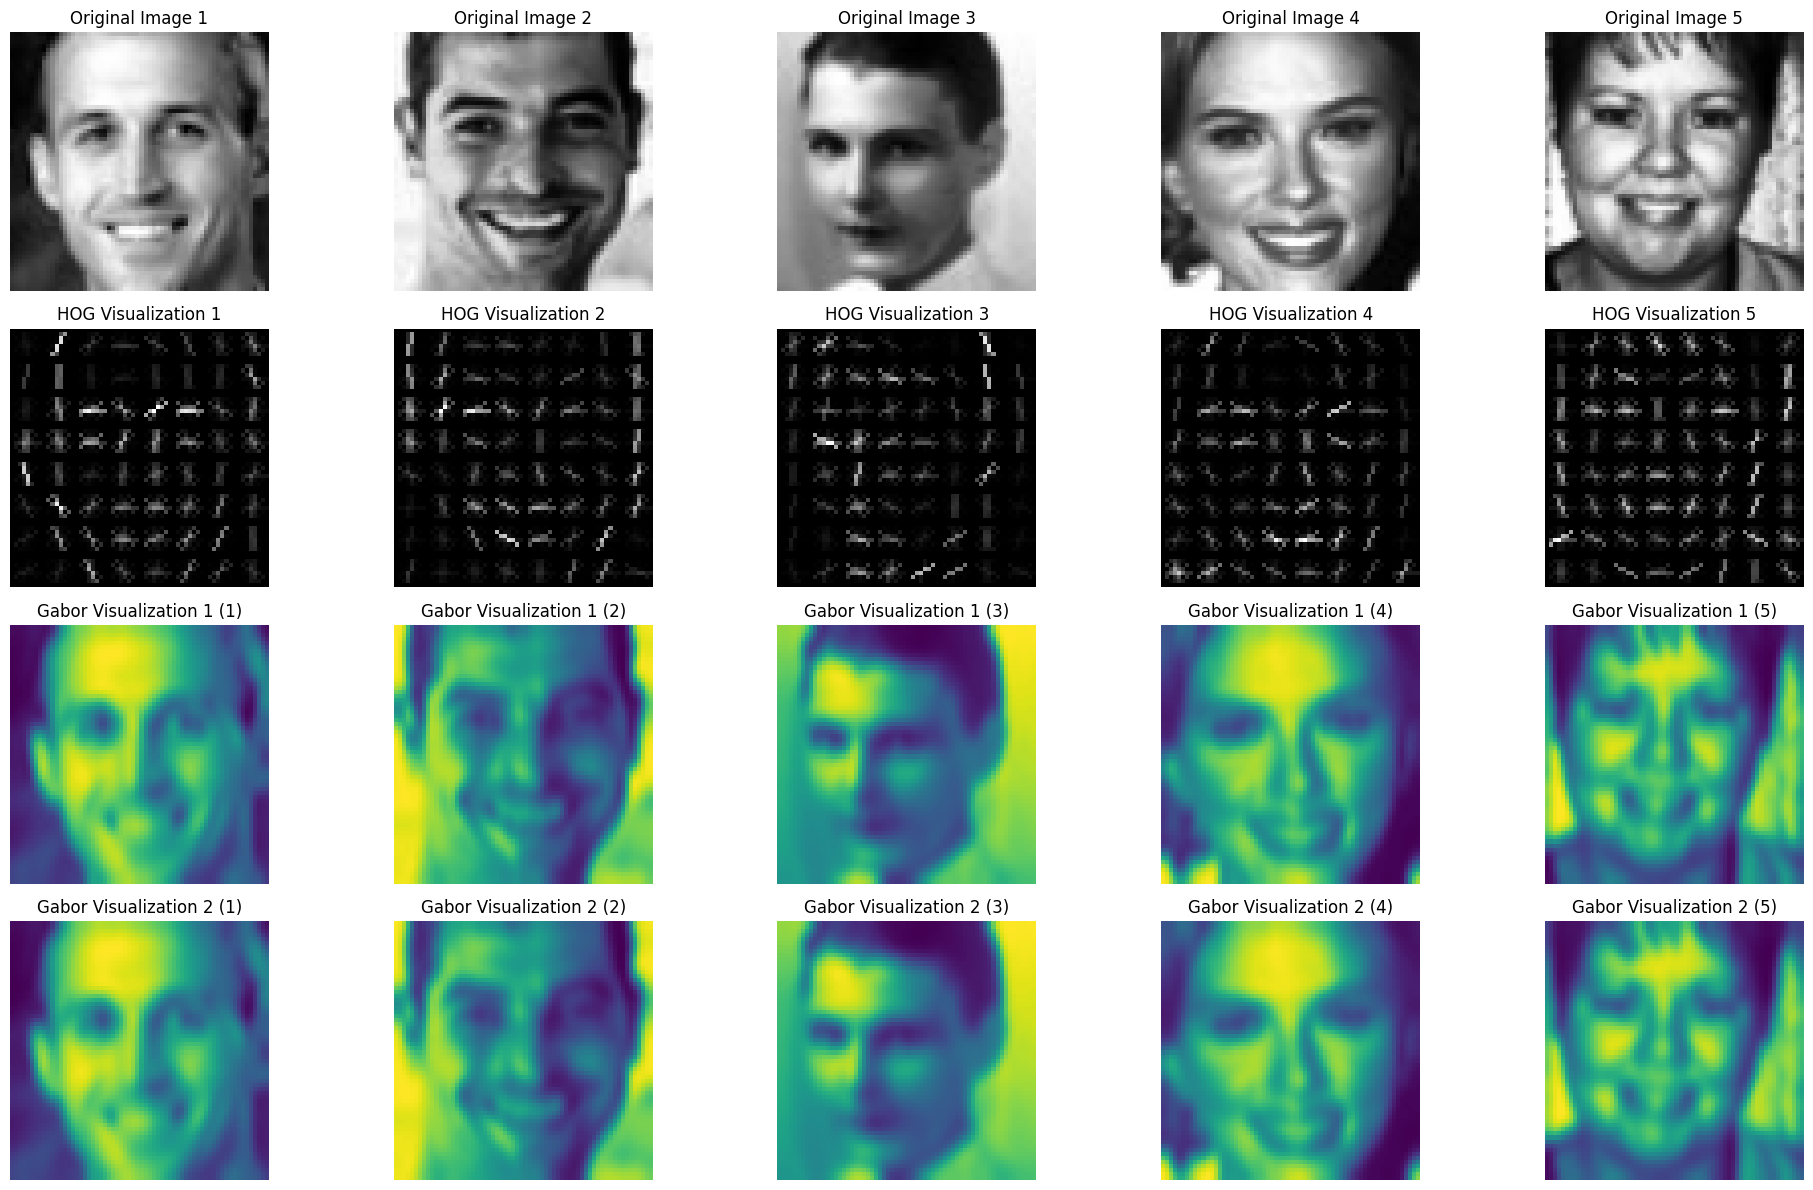

In [7]:
import cv2
import numpy as np
from skimage.feature import hog
import os
import matplotlib.pyplot as plt

# Preprocessing function
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    resized_img = cv2.resize(gray, (64, 64))
    return resized_img

# Function to apply Gabor filters
def apply_gabor_filters(image):
    responses = []
    # Create a set of Gabor kernels with different orientations and frequencies
    for theta in np.arange(0, np.pi, np.pi / 4):  # 4 orientations
        for sigma in (1, 3):  # Scales
            for lamda in (8, 16):  # Wavelengths
                kernel = cv2.getGaborKernel((9, 9), sigma, theta, lamda, 0.5, 0, ktype=cv2.CV_64F)
                filtered_image = cv2.filter2D(image, cv2.CV_64F, kernel)
                responses.append(filtered_image)
    return responses

# Extract HOG features combined with Gabor filters
def extract_features(images):
    features = []
    hog_visualizations = []  # Store HOG visualizations for visualization
    gabor_visualizations = []  # Store Gabor visualizations for visualization
    for img in images:
        img_preprocessed = preprocess_image(img)

        # HOG feature extraction
        hog_features, hog_image = hog(img_preprocessed, orientations=9, pixels_per_cell=(8, 8),
                                      cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)

        # Gabor filter responses
        gabor_features = apply_gabor_filters(img_preprocessed)

        # Combine features (flatten Gabor responses and concatenate with HOG features)
        combined_gabor_features = np.array([gabor.var() for gabor in gabor_features])  # Variance of Gabor responses
        combined_features = np.hstack((hog_features, combined_gabor_features))
        features.append(combined_features)

        # Save visualizations
        hog_visualizations.append(hog_image)
        gabor_visualizations.append(gabor_features)

    return np.array(features), hog_visualizations, gabor_visualizations

# Function to load and preprocess all images in the dataset
def load_images_from_directory(directory):
    images = []
    labels = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)

                    # Extract label from the folder structure
                    label = os.path.basename(os.path.dirname(img_path))
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data
train_path = '/content/FER2013_happy_sad/train'
test_path = '/content/FER2013_happy_sad/test'

X_train_images, y_train = load_images_from_directory(train_path)
X_test_images, y_test = load_images_from_directory(test_path)

X = np.concatenate((X_train_images, X_test_images), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Extract features and visualizations
X_features, hog_visualizations, gabor_visualizations = extract_features(X)

# Display HOG visualizations along with Gabor filter responses
plt.figure(figsize=(20, 12))
for i in range(5):  # Display for 5 images
    # Preprocess the image
    img_preprocessed = preprocess_image(X[i])

    # Display the original image
    plt.subplot(4, 5, i + 1)
    plt.imshow(img_preprocessed, cmap='gray')
    plt.title(f"Original Image {i + 1}")
    plt.axis('off')

    # Display HOG visualization
    plt.subplot(4, 5, i + 6)
    plt.imshow(hog_visualizations[i], cmap='gray')
    plt.title(f"HOG Visualization {i + 1}")
    plt.axis('off')

    # Display the first Gabor filter visualization
    plt.subplot(4, 5, i + 11)
    plt.imshow(gabor_visualizations[i][0], cmap='viridis')  # Displaying the first Gabor response
    plt.title(f"Gabor Visualization 1 ({i + 1})")
    plt.axis('off')

    # Display the second Gabor filter visualization
    plt.subplot(4, 5, i + 16)
    plt.imshow(gabor_visualizations[i][1], cmap='viridis')  # Displaying the second Gabor response
    plt.title(f"Gabor Visualization 2 ({i + 1})")
    plt.axis('off')

plt.tight_layout()
plt.show()


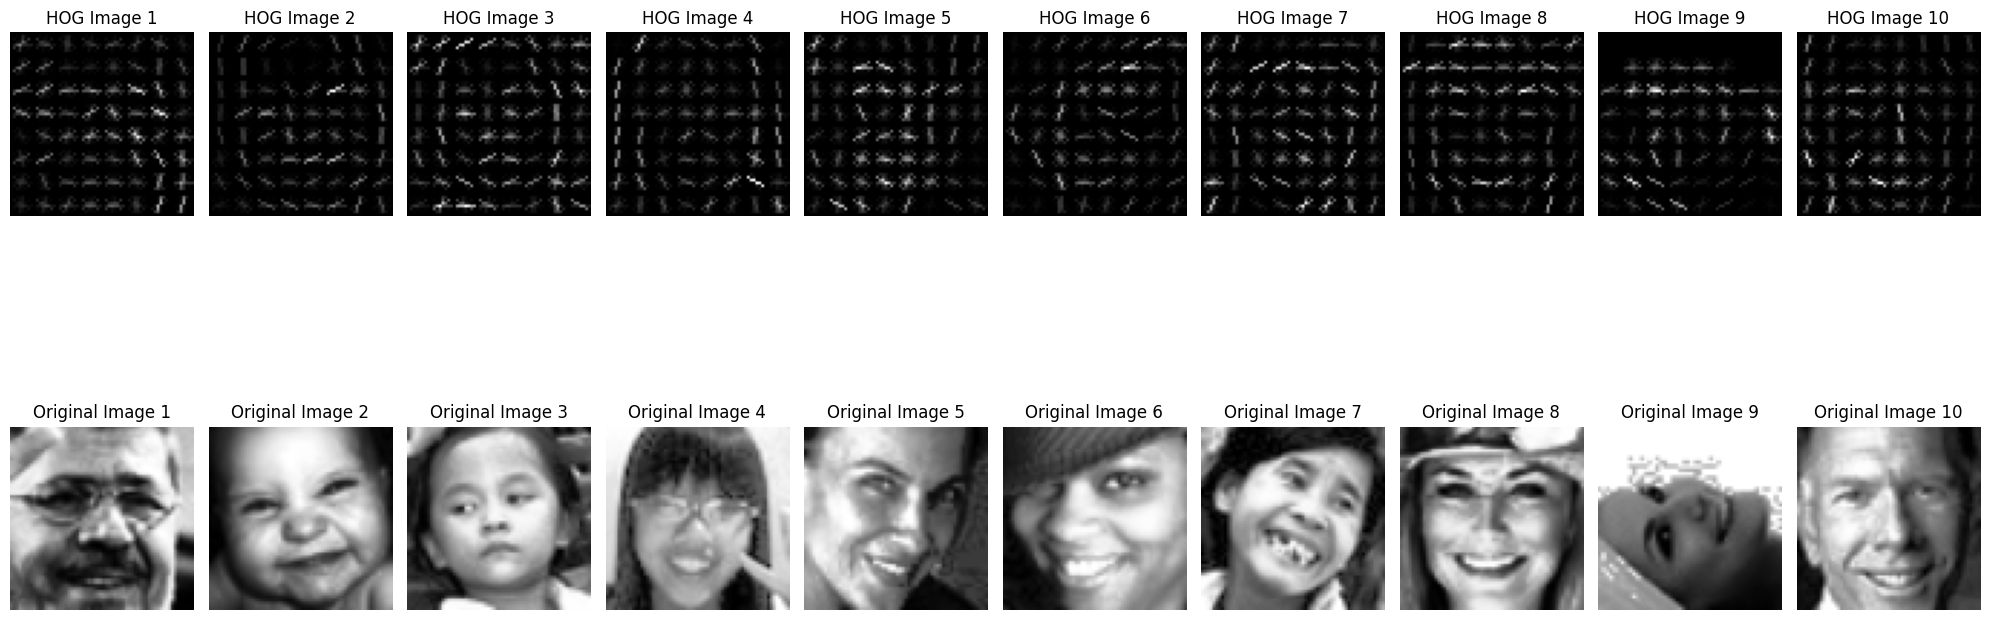

Training Set Size: 12052 samples
Testing Set Size: 3014 samples


In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preprocessing function
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    resized_img = cv2.resize(gray, (64, 64))
    return resized_img

# Function to apply Gabor filters
def apply_gabor_filters(image):
    gabor_kernels = []
    responses = []

    # Create a set of Gabor kernels with different orientations and frequencies
    for theta in np.arange(0, np.pi, np.pi / 4):  # 4 orientations
        for sigma in (1, 3):  # Scales
            for lamda in (8, 16):  # Wavelengths
                kernel = cv2.getGaborKernel((9, 9), sigma, theta, lamda, 0.5, 0, ktype=cv2.CV_64F)
                gabor_kernels.append(kernel)
                filtered_image = cv2.filter2D(image, cv2.CV_64F, kernel)
                responses.append(filtered_image.var())  # Capture the variance as a feature

    return np.array(responses)

# Extract HOG features combined with Gabor filters
def extract_features(images):
    features = []
    hog_visualizations = []  # Store HOG visualizations for visualization
    for img in images:
        img_preprocessed = preprocess_image(img)

        # HOG feature extraction
        hog_features, hog_image = hog(img_preprocessed, orientations=9, pixels_per_cell=(8, 8),
                                      cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)

        # Gabor filter responses
        gabor_features = apply_gabor_filters(img_preprocessed)

        # Combine features
        combined_features = np.hstack((hog_features, gabor_features))
        features.append(combined_features)
        hog_visualizations.append(hog_image)

    return np.array(features), hog_visualizations

# Function to load and preprocess all images in the dataset
def load_images_from_directory(directory):
    images = []
    labels = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)

                    # Extract label from the folder structure
                    label = os.path.basename(os.path.dirname(img_path))
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data
train_path = '/content/FER2013_happy_sad/train'
test_path = '/content/FER2013_happy_sad/test'

X_train_images, y_train = load_images_from_directory(train_path)
X_test_images, y_test = load_images_from_directory(test_path)

X = np.concatenate((X_train_images, X_test_images), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Extract features and visualizations
X_features, hog_visualizations = extract_features(X)

# Display a few HOG visualizations combined with Gabor features
plt.figure(figsize=(20, 10))
for i in range(10):  # Display HOG with Gabor for 10 images
    plt.subplot(2, 10, i + 1)
    plt.imshow(hog_visualizations[i], cmap='gray')
    plt.title(f"HOG Image {i+1}")
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(preprocess_image(X[i]), cmap='gray')
    plt.title(f"Original Image {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, stratify=y, random_state=42)

# Print train and test sizes
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training the Random Forest Classifier...
Classification Report:
              precision    recall  f1-score   support

       happy       0.76      0.87      0.82      1798
         sad       0.76      0.60      0.67      1216

    accuracy                           0.76      3014
   macro avg       0.76      0.74      0.74      3014
weighted avg       0.76      0.76      0.76      3014

Accuracy: 76.38%


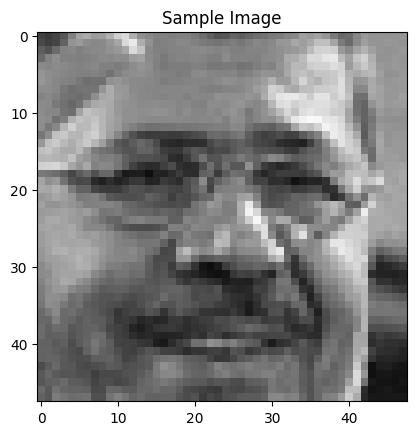

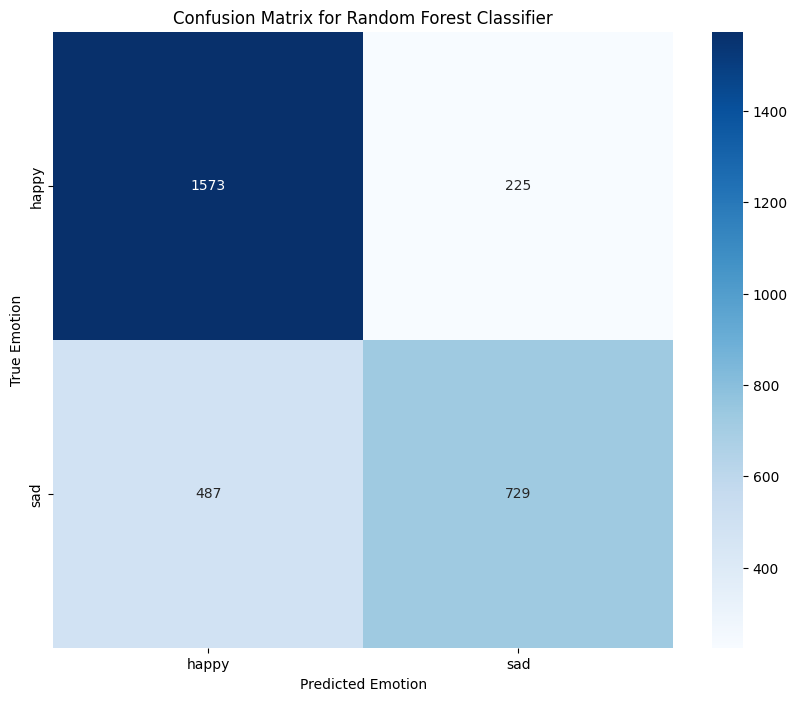

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Random Forest Classifier
print("Training the Random Forest Classifier...")
rf.fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display a sample image to verify it loaded correctly (optional)
plt.imshow(cv2.cvtColor(X_train_images[0], cv2.COLOR_BGR2RGB))
plt.title('Sample Image')
plt.show()

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


SVM with RBF Kernel Accuracy: 82.18%
Classification Report:
              precision    recall  f1-score   support

       happy       0.84      0.87      0.85      1798
         sad       0.80      0.75      0.77      1216

    accuracy                           0.82      3014
   macro avg       0.82      0.81      0.81      3014
weighted avg       0.82      0.82      0.82      3014



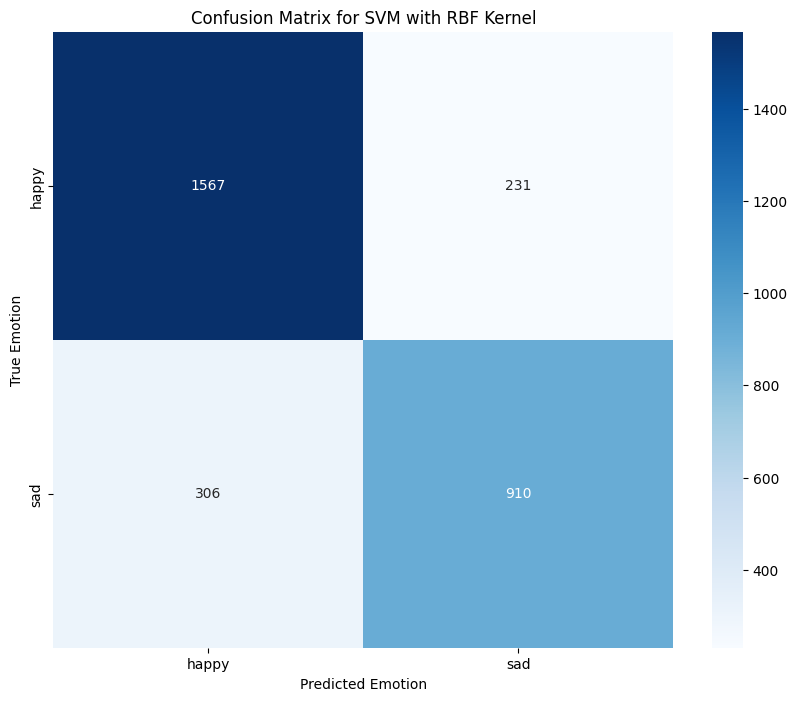

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train an SVM classifier with class weighting
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM with RBF Kernel Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

SVM with RBF Kernel C=10 Accuracy: 83.44%
Classification Report:
              precision    recall  f1-score   support

       happy       0.85      0.88      0.86      1798
         sad       0.81      0.77      0.79      1216

    accuracy                           0.83      3014
   macro avg       0.83      0.82      0.83      3014
weighted avg       0.83      0.83      0.83      3014



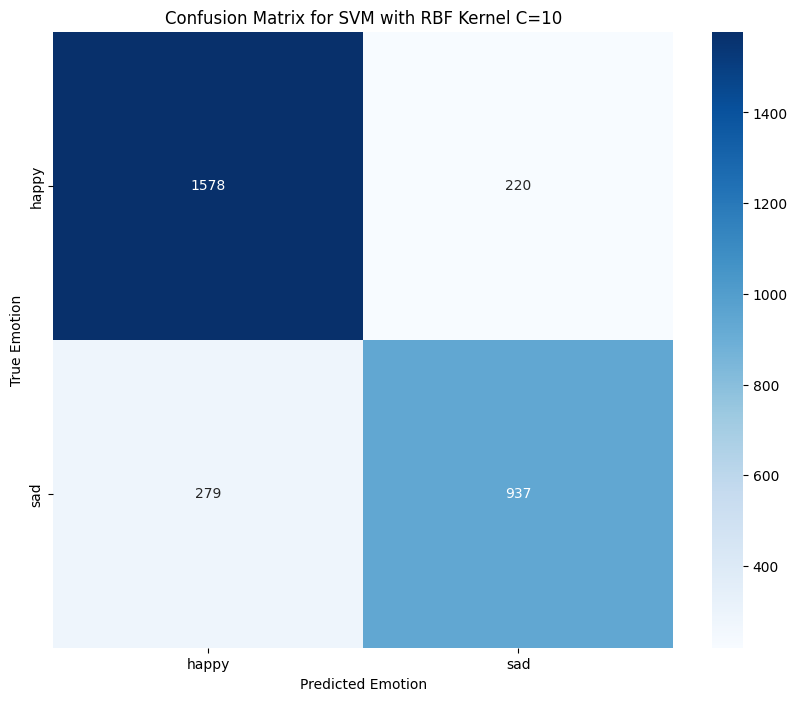

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train an SVM classifier with class weighting
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM with RBF Kernel C=10 Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for SVM with RBF Kernel C=10")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

KNN Accuracy: 75.51%
KNN Classification Report:
              precision    recall  f1-score   support

       happy       0.73      0.93      0.82      1798
         sad       0.83      0.50      0.62      1216

    accuracy                           0.76      3014
   macro avg       0.78      0.71      0.72      3014
weighted avg       0.77      0.76      0.74      3014



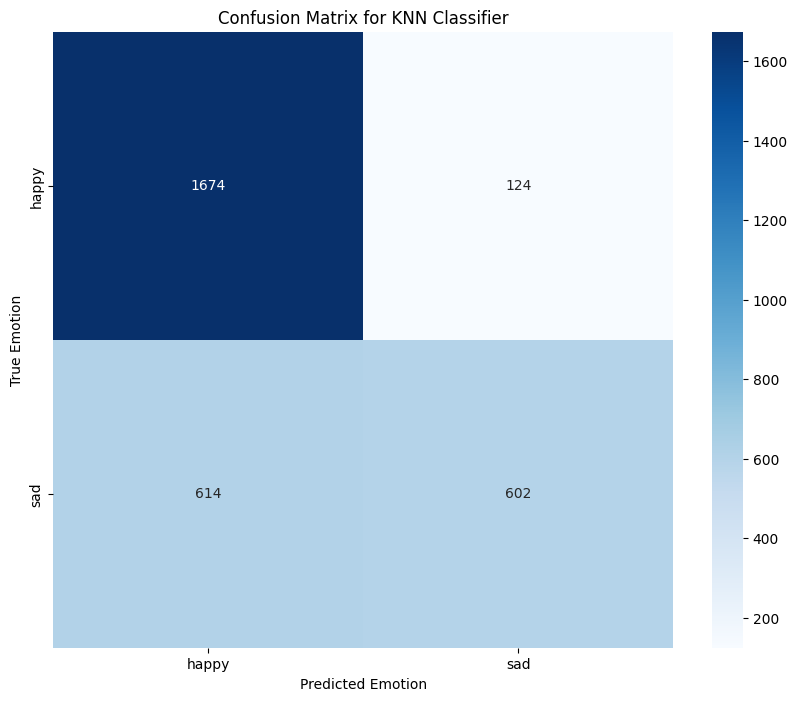

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Train a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


Extracted 15066 combined feature vectors from all images.
Training set size: 12052 samples
Testing set size: 3014 samples


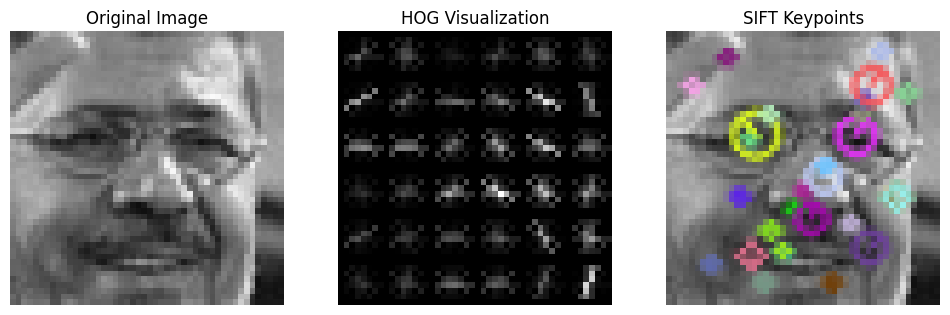

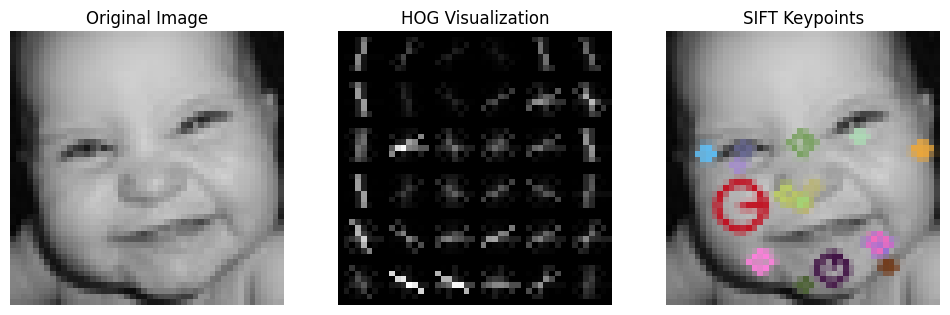

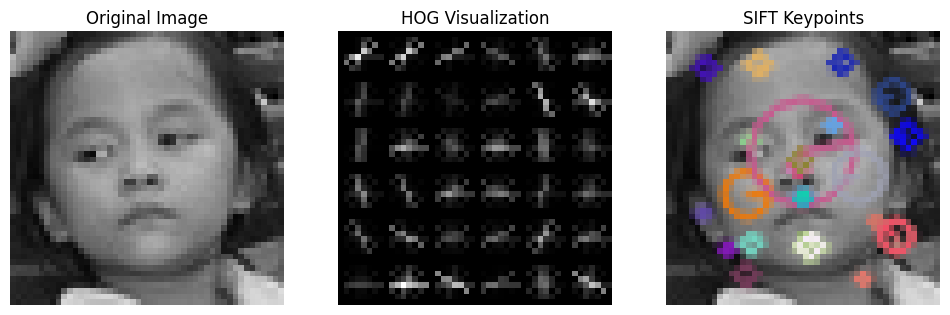

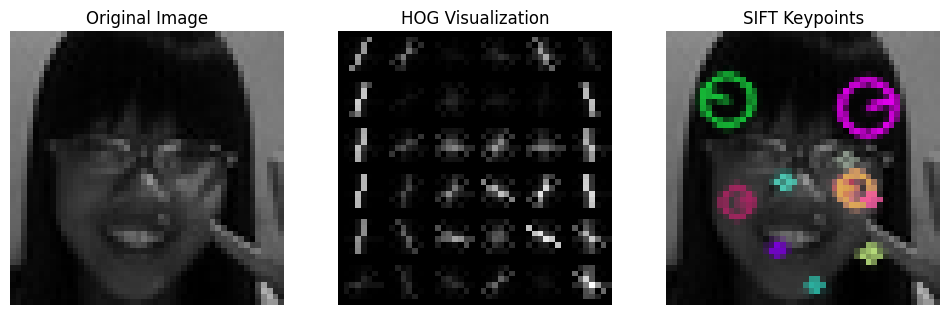

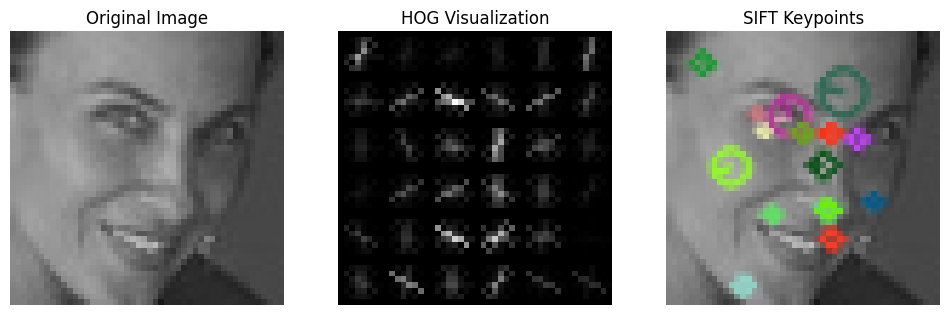

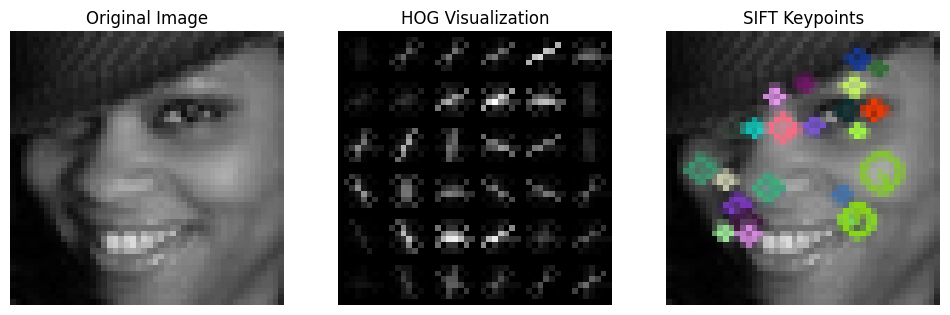

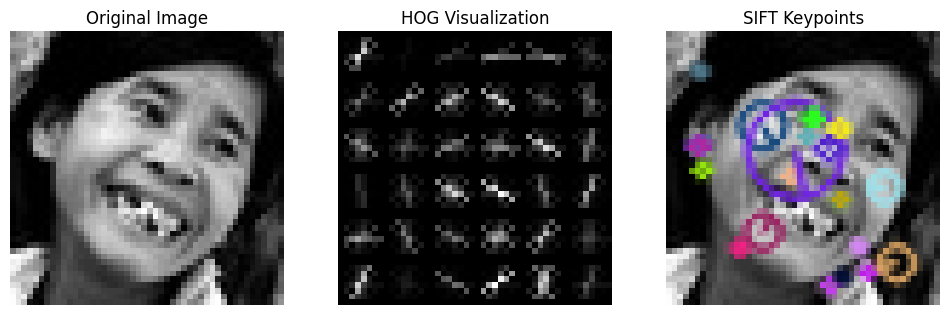

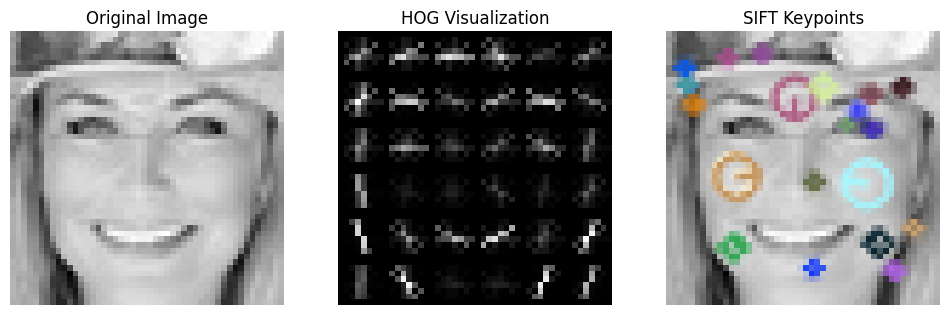

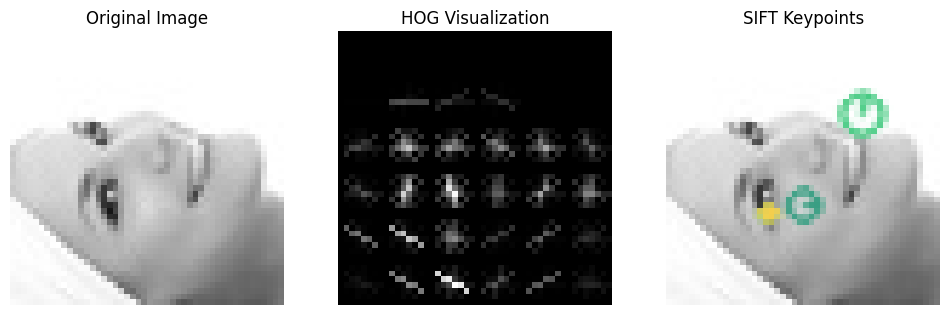

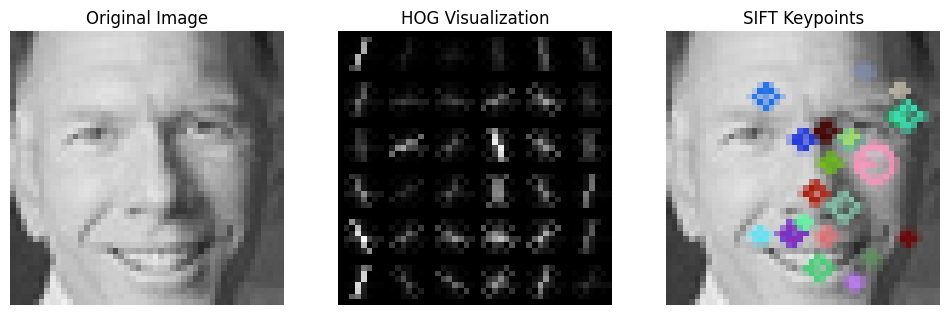

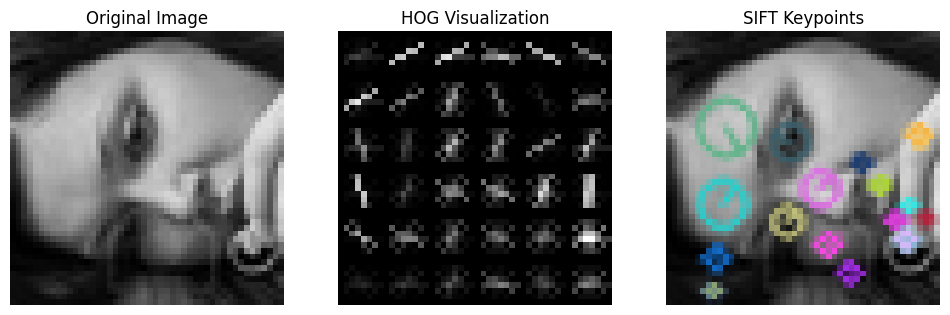

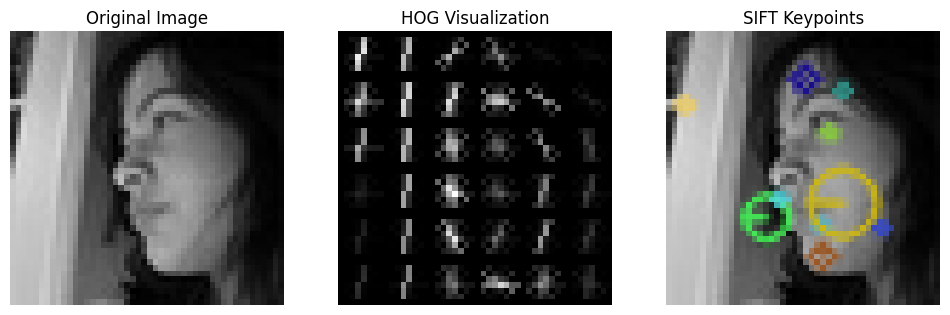

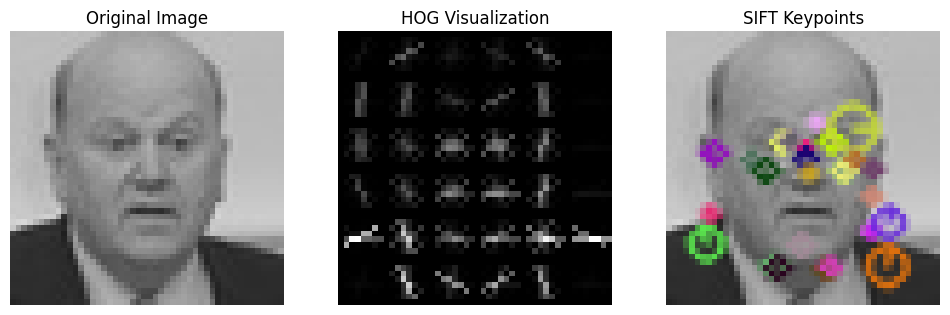

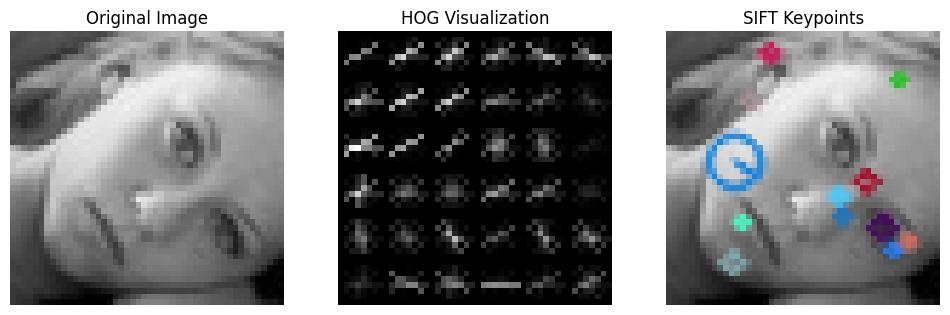

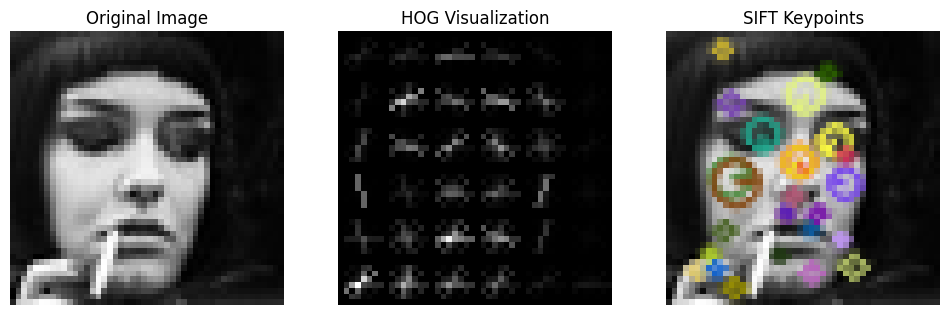

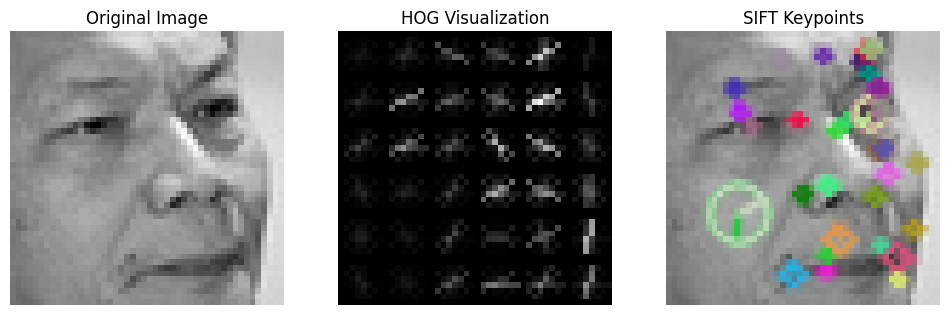

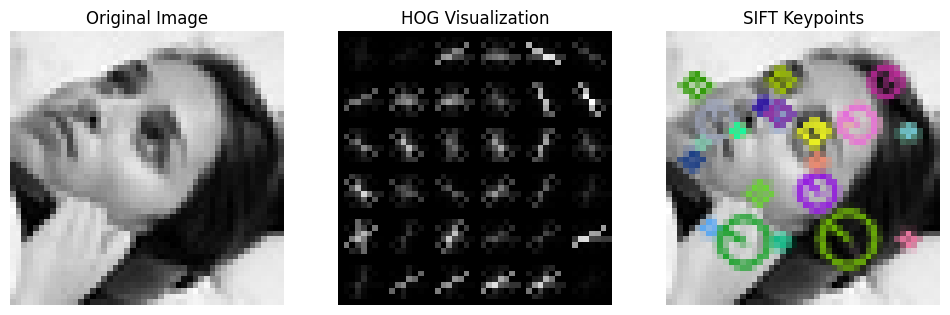

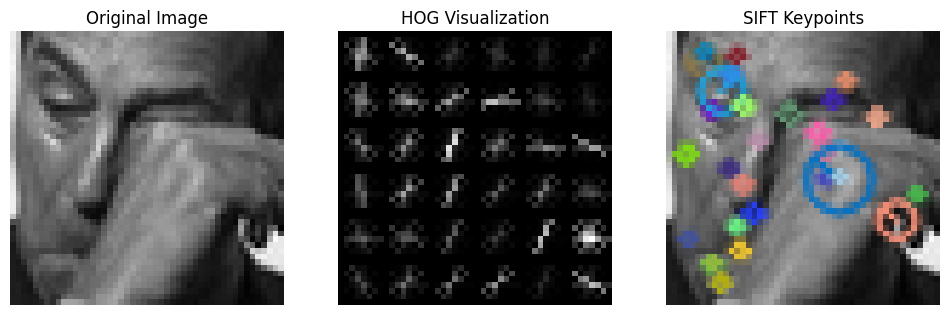

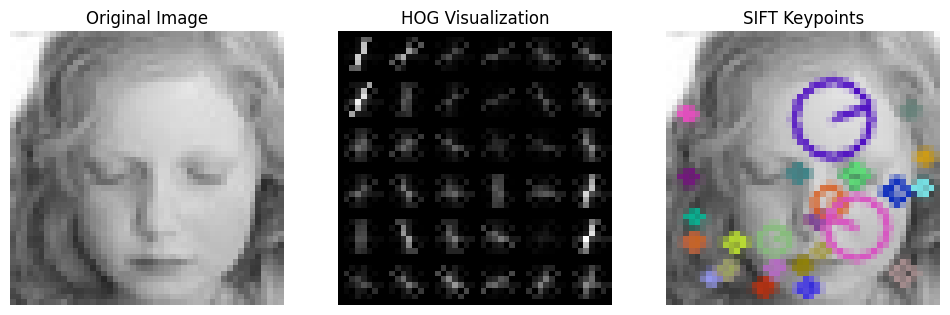

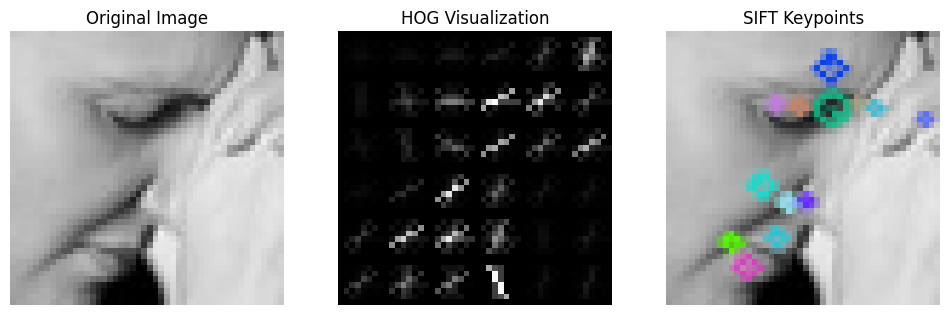

In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Paths to the dataset
dataset_path = '/content/FER2013_happy_sad'  # Change to your mounted path
emotions = ['happy', 'sad']  # Emotion labels

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Maximum length for SIFT features (choose based on the dataset)
MAX_SIFT_FEATURES = 500  # Adjust this value if necessary

# Function to extract HOG features
def extract_hog_features(image, visualize=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if visualize:
        hog_features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                                      cells_per_block=(2, 2), visualize=True)
        return hog_features, hog_image
    else:
        hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        return hog_features

# Function to extract SIFT features with fixed length
def extract_sift_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Handle cases with no descriptors
    if descriptors is None:
        return np.zeros(MAX_SIFT_FEATURES)

    # Flatten descriptors and pad/truncate to a fixed length
    flattened = descriptors.flatten()
    if len(flattened) < MAX_SIFT_FEATURES:
        # Pad with zeros
        padded = np.hstack((flattened, np.zeros(MAX_SIFT_FEATURES - len(flattened))))
        return padded
    else:
        # Truncate to the maximum length
        return flattened[:MAX_SIFT_FEATURES]

# Data lists for all images
X = []
y = []

# Loop through each set (train and test), each emotion, and extract features
for set_folder in ['train', 'test']:
    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, set_folder, emotion)
        for img_name in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                # Extract HOG features
                hog_features = extract_hog_features(img)

                # Extract SIFT features
                sift_features = extract_sift_features(img)

                # Combine HOG and SIFT features
                combined_features = np.hstack((hog_features, sift_features))

                X.append(combined_features)
                y.append(emotion)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"Extracted {len(X)} combined feature vectors from all images.")

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shape of the training and testing sets to verify
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Visualize HOG + SIFT features for 10 images
for i, emotion in enumerate(emotions):
    emotion_path = os.path.join(dataset_path, 'train', emotion)
    img_names = os.listdir(emotion_path)

    # Display only 10 images
    for j, img_name in enumerate(img_names[:10]):
        img_path = os.path.join(emotion_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            # Extract HOG features and visualization
            hog_features, hog_image = extract_hog_features(img, visualize=True)

            # Extract SIFT keypoints
            keypoints, _ = sift.detectAndCompute(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), None)
            img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

            # Display the original image, HOG visualization, and SIFT keypoints
            plt.figure(figsize=(12, 6))

            # Original image
            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')

            # HOG visualization
            plt.subplot(1, 3, 2)
            plt.imshow(hog_image, cmap='gray')
            plt.title('HOG Visualization')
            plt.axis('off')

            # SIFT keypoints
            plt.subplot(1, 3, 3)
            plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
            plt.title('SIFT Keypoints')
            plt.axis('off')

            plt.show()

        # Stop after visualizing 10 images
        if j == 9:
            break


Training the Random Forest Classifier...
Classification Report:
              precision    recall  f1-score   support

       happy       0.75      0.88      0.81      1767
         sad       0.77      0.58      0.66      1247

    accuracy                           0.76      3014
   macro avg       0.76      0.73      0.74      3014
weighted avg       0.76      0.76      0.75      3014

Accuracy: 75.68%


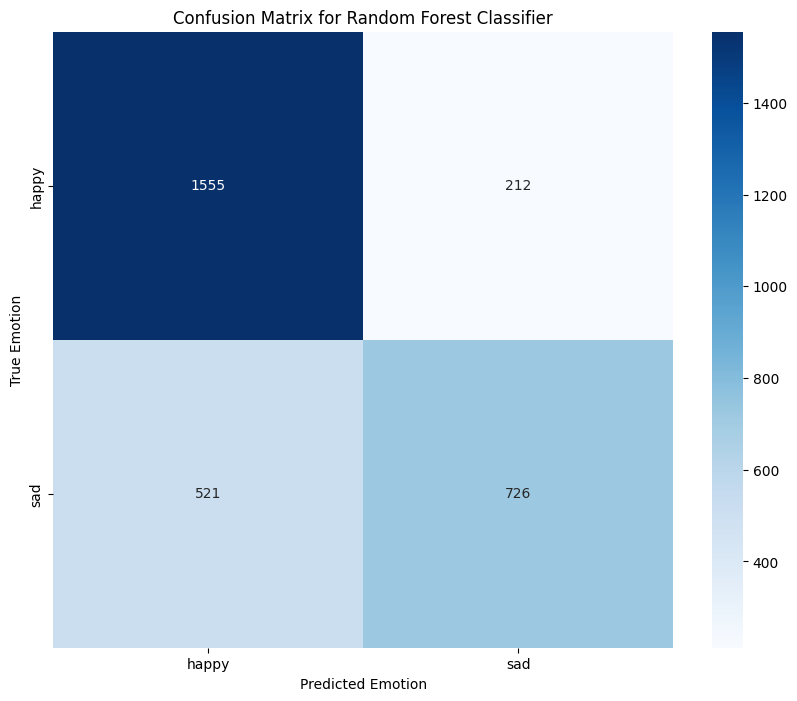

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the Random Forest Classifier
print("Training the Random Forest Classifier...")
rf.fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


SVM with RBF Kernel Accuracy: 79.60%
Classification Report:
              precision    recall  f1-score   support

       happy       0.82      0.84      0.83      1767
         sad       0.77      0.73      0.75      1247

    accuracy                           0.80      3014
   macro avg       0.79      0.79      0.79      3014
weighted avg       0.79      0.80      0.80      3014



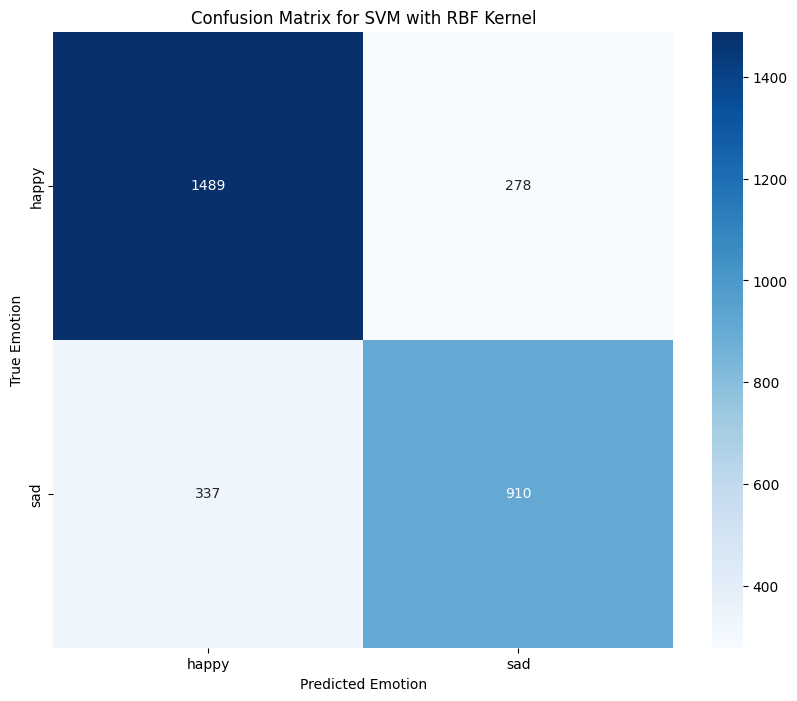

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train an SVM classifier with C=1
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM with RBF Kernel Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

SVM with RBF Kernel Accuracy C=10: 81.42%
Classification Report:
              precision    recall  f1-score   support

       happy       0.84      0.85      0.84      1767
         sad       0.78      0.76      0.77      1247

    accuracy                           0.81      3014
   macro avg       0.81      0.81      0.81      3014
weighted avg       0.81      0.81      0.81      3014



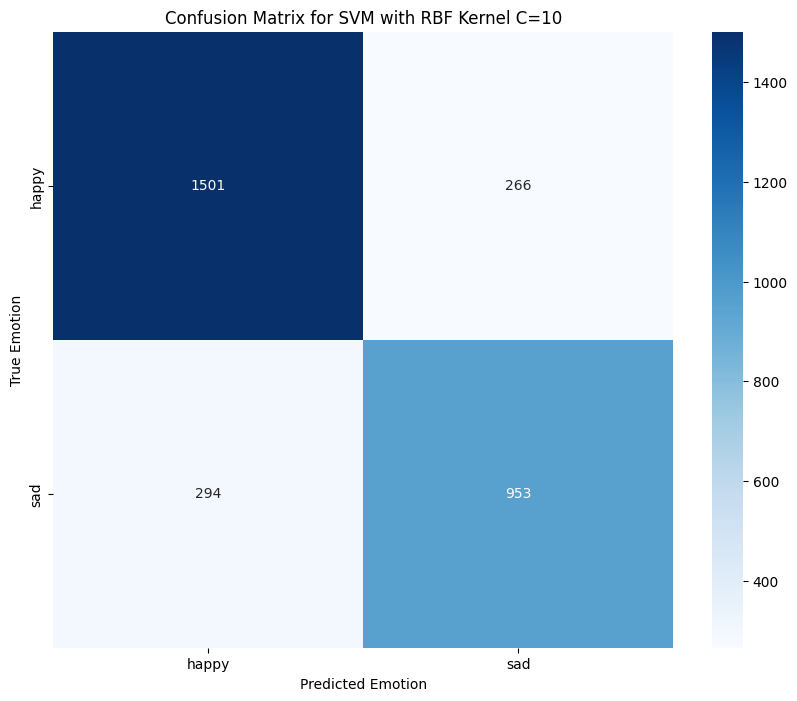

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train an SVM classifier with C=10
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM with RBF Kernel Accuracy C=10: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for SVM with RBF Kernel C=10")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

KNN Accuracy: 71.00%
KNN Classification Report:
              precision    recall  f1-score   support

       happy       0.69      0.93      0.79      1767
         sad       0.81      0.39      0.53      1247

    accuracy                           0.71      3014
   macro avg       0.75      0.66      0.66      3014
weighted avg       0.74      0.71      0.68      3014



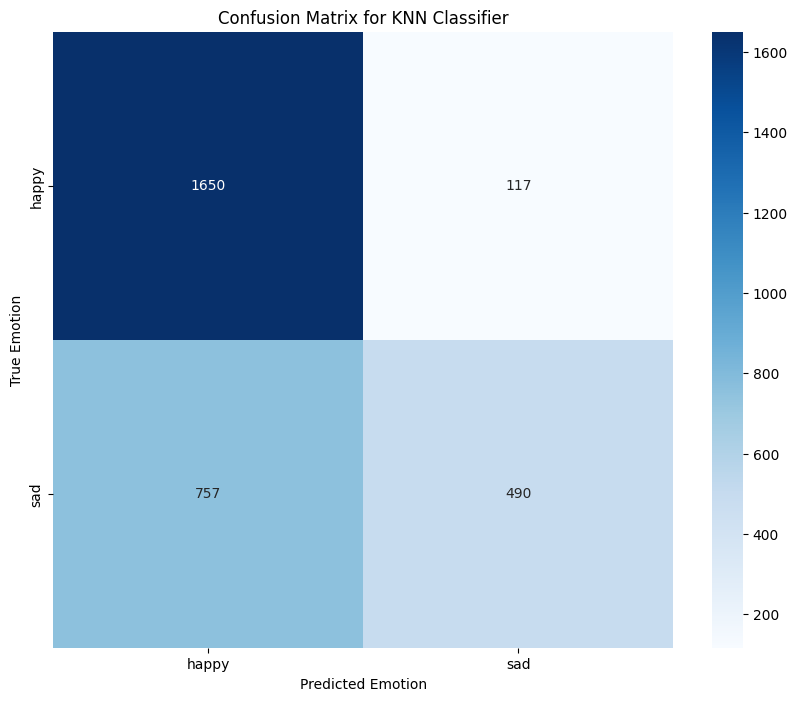

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Train a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()
